**The given Telco-Customer-Churn data is being grouped in three aspect;**

# Target:

* Churn

# Numeric Feature:

* Tenure
* MonthlyCharges
* TotalCharges

# Categorical Features:

* Gender
* SeniorCitizen
* Dependents
* PhoneService
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaperlessBilling
* PaymentMethod

.

# QUESTIONS ON TARGET

* What is the total percentage/ number of those who churn?

# QUESTIONS ON Numeric Feature

* Is there a relationship between Churn and Tenure?
* Is there a relationship between Churn and monthly charges/ does increase in monthly charges leads to churn?

# QUESTIONS ON Categorical Features

* What is the overall gender composition(number of males and females)
* What is the Gender Distribution by Churn(whether males churn more than females)
* Senior Citizen and non Senior Citizen, who churn most?
* What is the percentage of those with partner and those without partner?
* Those with partner and those without partner,who churn most?
* Those who  has dependents and those who don't have ,who churn most?
* Those with single line churn most?...monthly charges
* What is the number of people churn by InternetService?
* What is the number of people churn by Contract type?
* What is the number of people churn by PaperlessBilling?
* What is the number of people churn by PaymentMethod?

In [134]:
!pip install unidecode
!pip install sklearn
!pip install imblearn
!pip install GraphViz
!pip install CatBoost
!pip install SweetViz
!pip install pandas-profiling

     ------------------------------------ 315.3/315.3 kB 977.6 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.9 MB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 983.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 703.8/703.8 kB 765.6 kB/s eta 0:00:00
     ------------------------------------ 151.7/151.7 kB 906.5 kB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 772.8 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 2.0 MB/s eta 0:00:00


     ------------------------------------ 233.8/233.8 kB 843.8 kB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=1cb02c401431224b6b9e003ae167aba404135c6df07eb18b57852ecd4a86d94e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\dd\91\29\a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import squarify
import csv
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
from unidecode import unidecode
pd.set_option('display.max_columns',None)
import sweetviz as sv


In [138]:
data = pd.read_csv(r'C:\Users\USER\Desktop\Classification project\Telco-Customer-Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95      1889.50   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [139]:
#dropping ID column
data.drop(data.columns[[0]], axis=1, inplace=True)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [141]:
#converting 'TotalCharges' column to float type...
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**it seems we were having 11 empty spaces in the TotalCharges column...let's check why**

In [143]:
#checking if a person couldn't stay with the company 
data[data['tenure']==0]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

**Since we are interested in the Number of months the customer has stayed with the company , we will drop data of all who couldn't stay with the company and having empty Totalcharges** 

In [144]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [145]:
#checking for missing values
null_values=pd.isnull(data).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/data.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

Missing Data  Percentage
Columns                                   
gender                       0         0.0
SeniorCitizen                0         0.0
TotalCharges                 0         0.0
MonthlyCharges               0         0.0
PaymentMethod                0         0.0
PaperlessBilling             0         0.0
Contract                     0         0.0
StreamingMovies              0         0.0
StreamingTV                  0         0.0
TechSupport                  0         0.0
DeviceProtection             0         0.0
OnlineBackup                 0         0.0
OnlineSecurity               0         0.0
InternetService              0         0.0
MultipleLines                0         0.0
PhoneService                 0         0.0
tenure                       0         0.0
Dependents                   0         0.0
Partner                      0         0.0
Churn                        0         0.0

In [146]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

**It looks like we don't have much trouble with missing data now... So we will go straight to answering our quesgtions**


In [147]:
#Print number of unique values per feature location
print(f"Unique Values: {data.nunique()} \n")

Unique Values: gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64 



# TARGET

**What is the total percentage/ number of those who churn?**

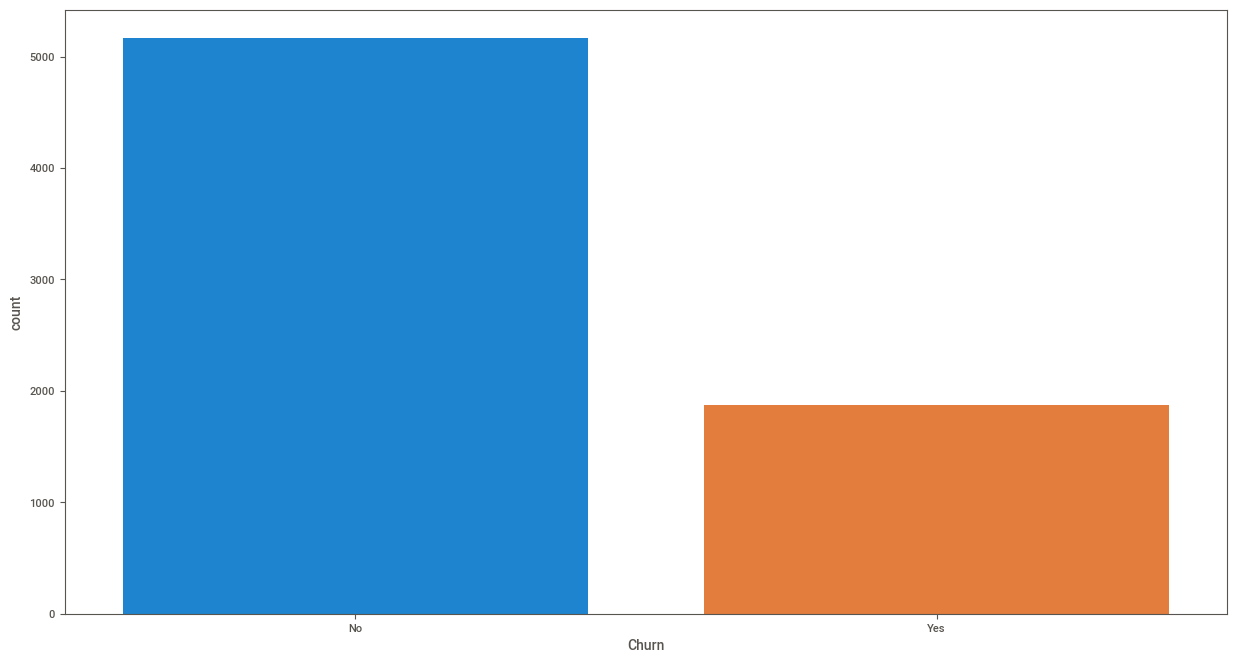

In [148]:
#churn count
sns.countplot(data=data, x='Churn')

#Churn percentage
fig1 = go.Figure(
    data=go.Pie(values=data['Churn'].value_counts().values,labels=data['Churn'].value_counts().index,title='percentage of those who churn'))
fig1.show()
plt.show()
rcParams['figure.figsize'] = 15,8

**We are having those who churn to have a percentage of 26.5(1889) and 
those don't churn to be 73.5(5163)**

# Numeric Feature

**1.1 Is there a relationship between Churn and Tenure?**

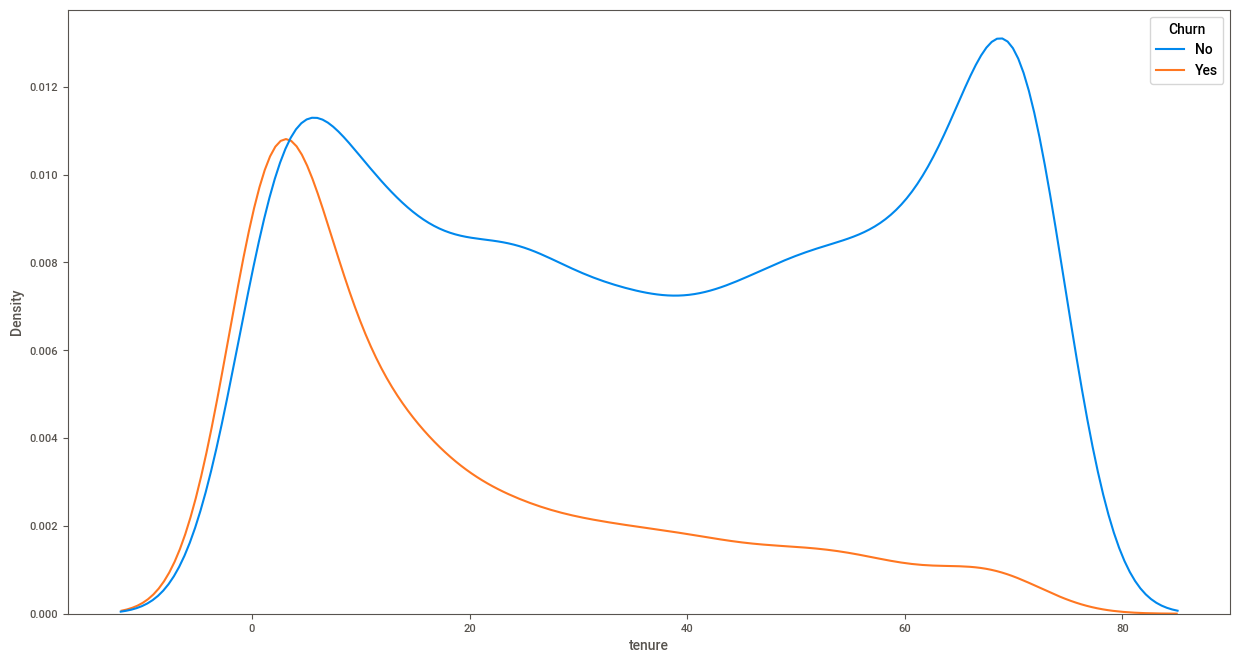

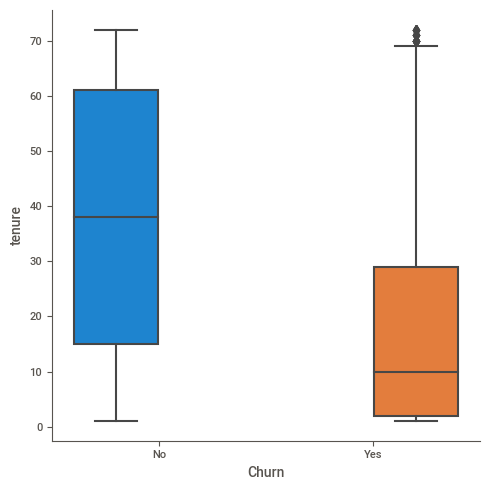

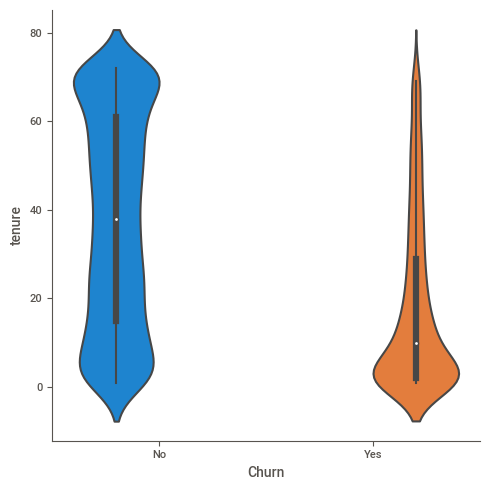

In [149]:
#tenure relation with churn
rcParams['figure.figsize'] = 15,8
sns.kdeplot(data= data, x='tenure', hue='Churn')
sns.catplot(data= data, x='Churn',y='tenure',kind='box', hue='Churn')
sns.catplot(data= data, x='Churn',y='tenure',kind='violin', hue='Churn')

In [150]:
#copying data so that grouping of the tenure won't affect our main dataframe
df = data.copy()
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [151]:
#creating a function to group tenure in months
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [152]:
def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

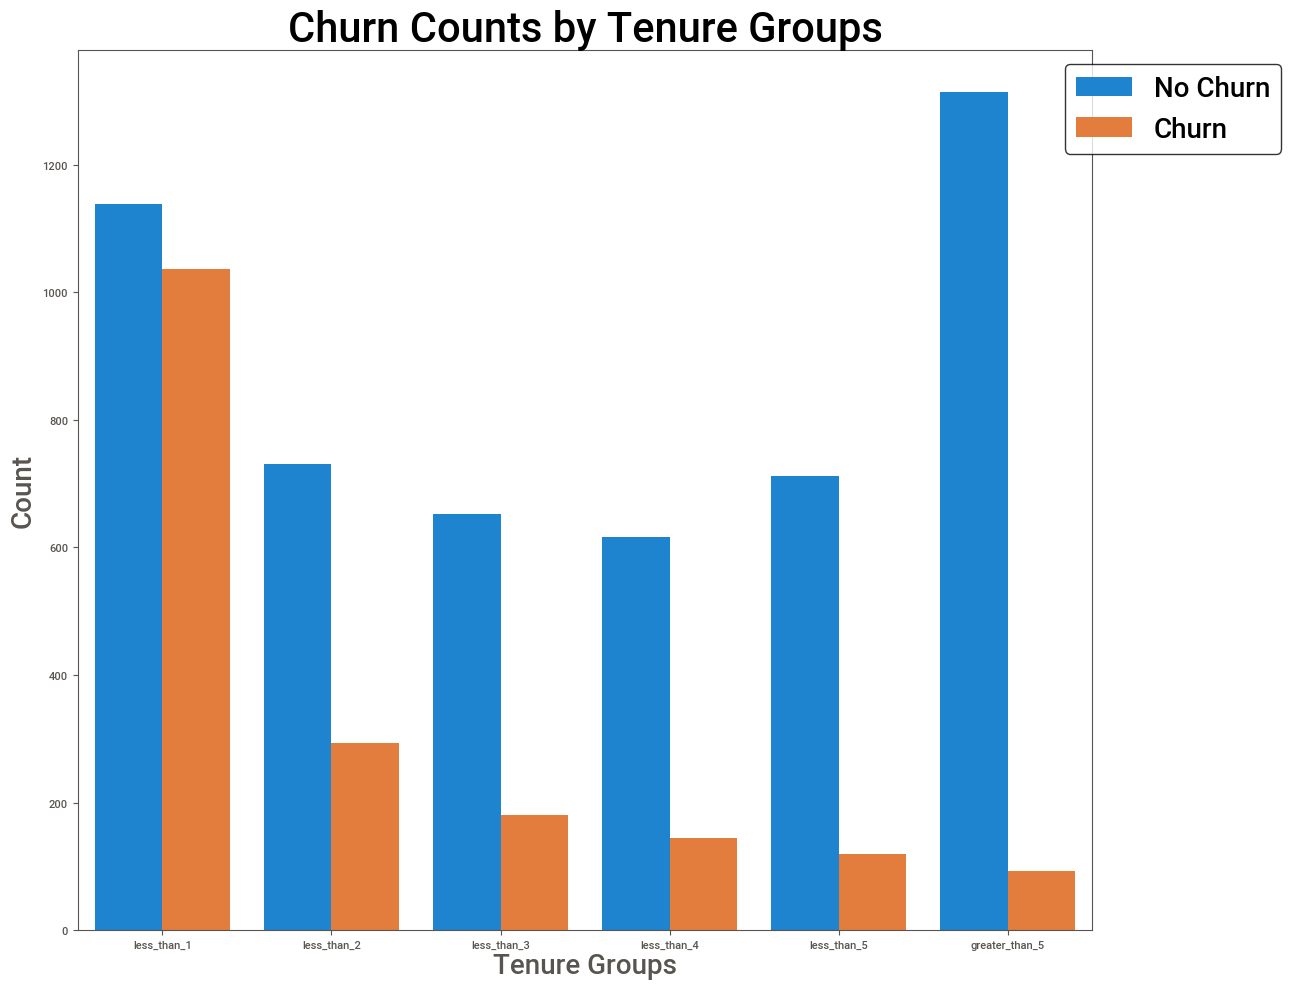

In [153]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)
tenure_group_counts(df)

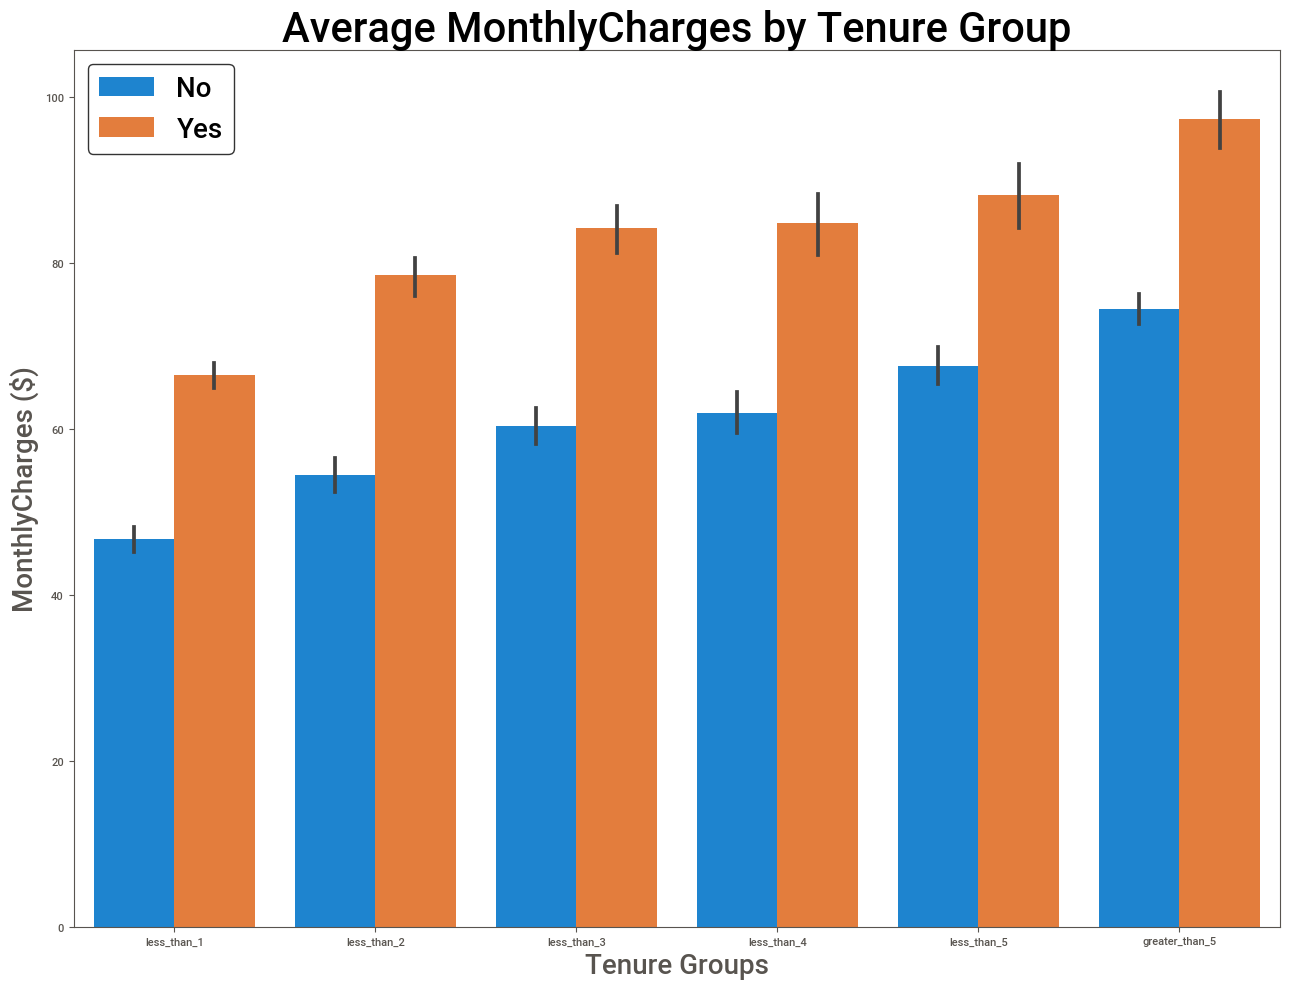

In [154]:
def plot_numerical_averages(df, feature):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'grouped_tenure', y = feature, hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    b.set_xlabel('Tenure Groups', fontweight = 'bold', fontsize = 20)
    b.set_ylabel(f'{feature} ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()
plot_numerical_averages(df, 'MonthlyCharges')

* Customers with shorter service tenures (newer clients) are more likely to churn than those with longer tenures....so most of the people who left service had less tenure

* Monthly Charges: In general, the likelihood of a customer churning increases as charges rise, with customers having the highest likelihood of churning when their monthly charges approach $60.



**1.2 Is there a relationship between Churn and monthly charges/ does increase in monthly charges leads to churn?**

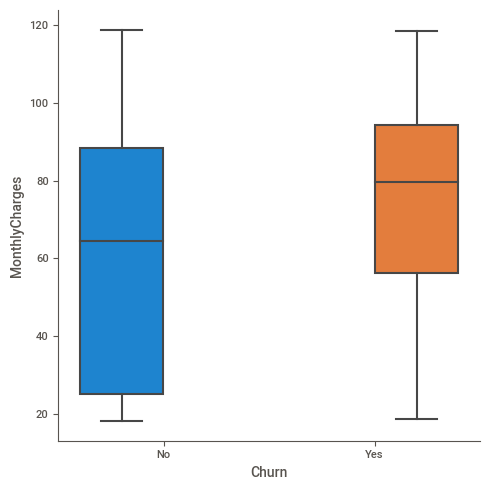

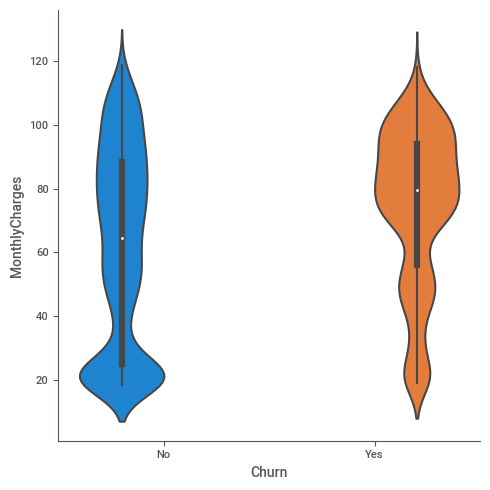

In [155]:
#MonthlyCharges relation with churn
sns.catplot(data= data, x='Churn',y='MonthlyCharges',kind='box', hue='Churn')
sns.catplot(data= data, x='Churn',y='MonthlyCharges',kind='violin', hue='Churn')

* From the above graph, we can see that the people who left had higher monthly charges.

# Questions on Categorical Features

**1.1 What is the overall gender composition(number of males and females)**

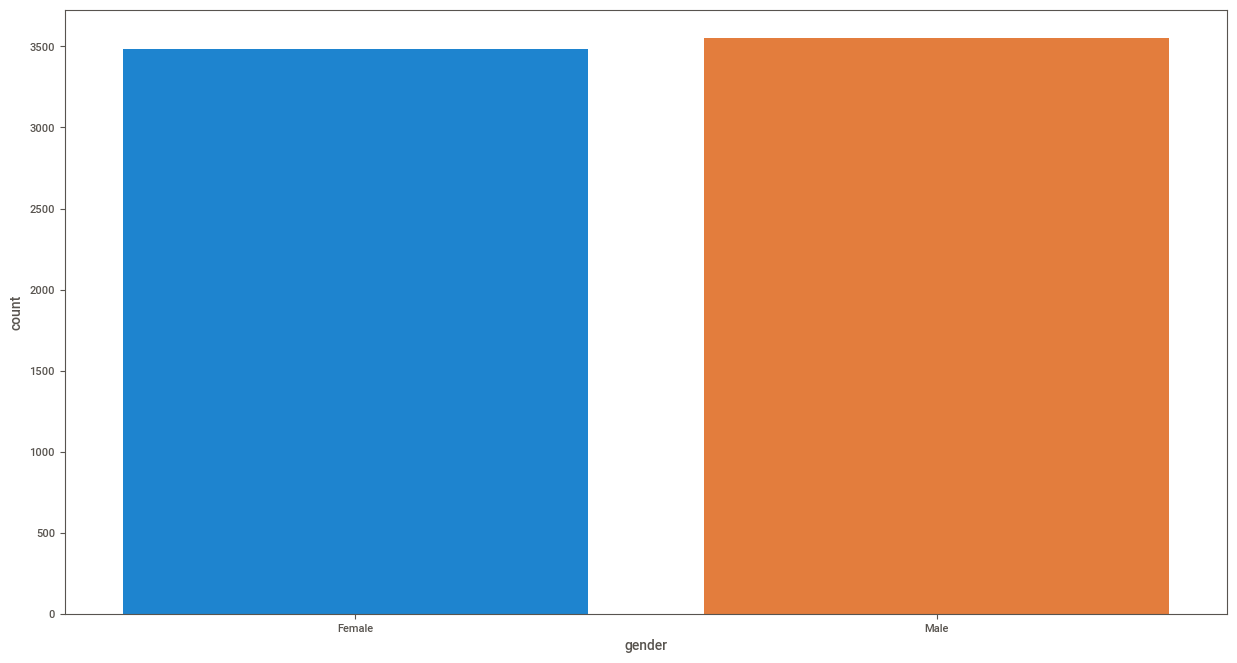

In [156]:
sns.countplot(data=data,x='gender')
fig1 = go.Figure(
    data=go.Pie(values=data['gender'].value_counts().values,labels=data['gender'].value_counts().index,title='percentage of males and female'))
fig1.show()
plt.show
rcParams['figure.figsize'] = 15,8

According to the pie chart,we have 3488(49.5%) females and 3555(50.5%) males


**1.2 What is the Gender Distribution by Churn(whether males churn more than females)**

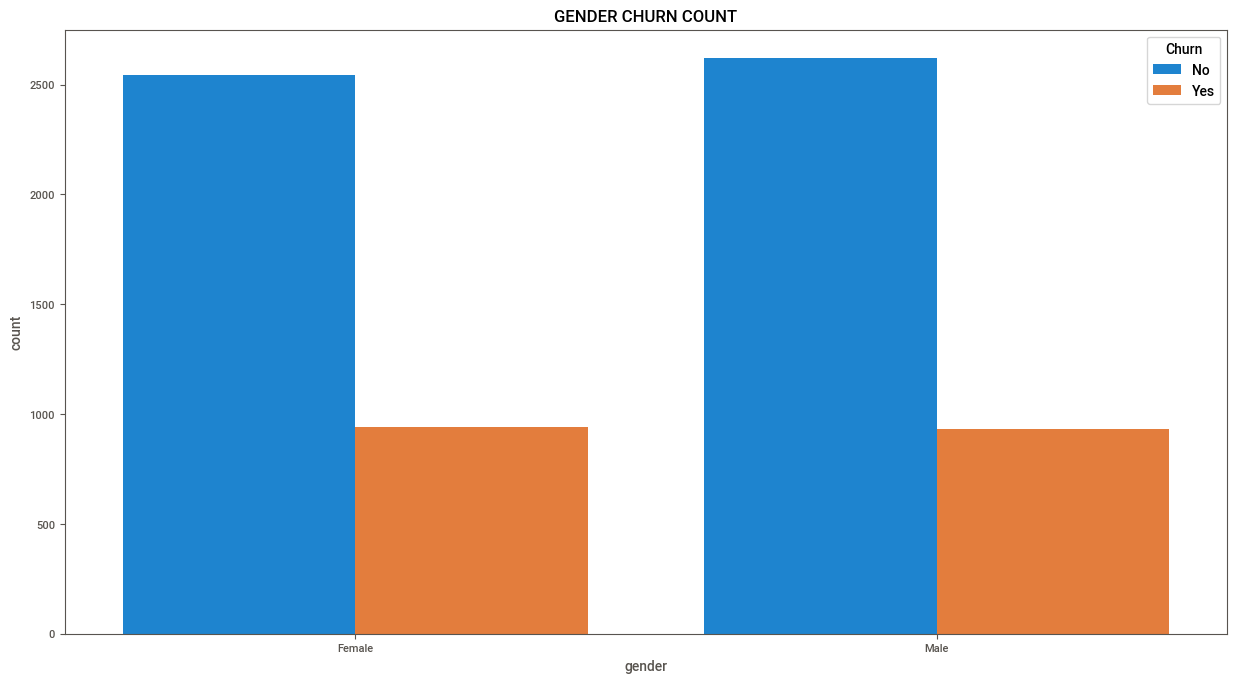

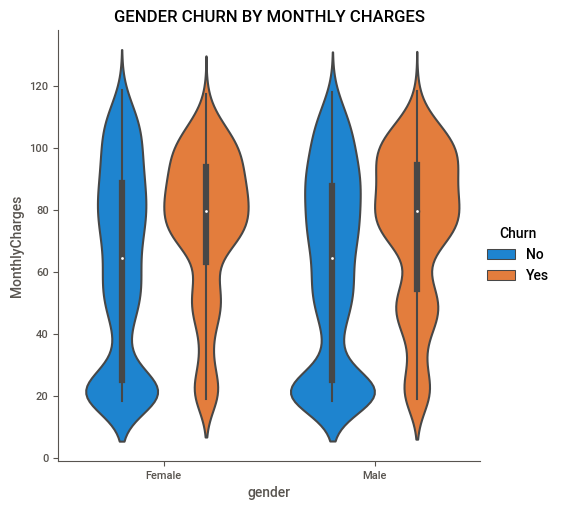

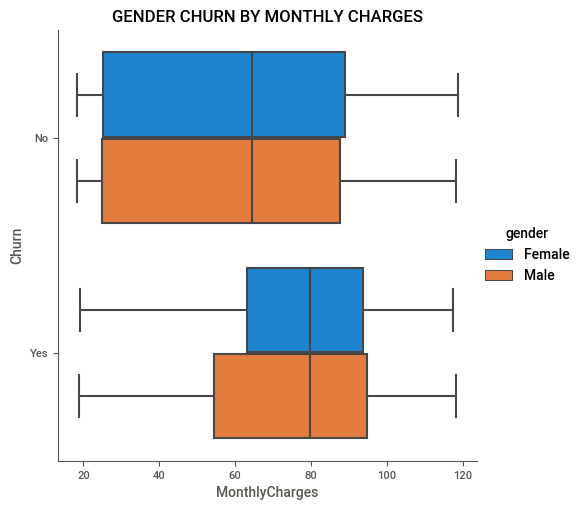

In [157]:
#GENDER CHURN
rcParams['figure.figsize'] = 15,8
sns.countplot(data=data,x='gender',hue='Churn').set(title='GENDER CHURN COUNT')

#Gender churn by monthly charges
sns.catplot(data=data,x='gender',y='MonthlyCharges', kind='violin',hue='Churn').set(title='GENDER CHURN BY MONTHLY CHARGES')
plt.show()

#Gender churn by monthly charges
sns.catplot(data=data,x='MonthlyCharges',y='Churn', kind='box',hue='gender').set(title='GENDER CHURN BY MONTHLY CHARGES')
plt.show()

* In our sample so far, gender is equally represented and doesn't seem to be a churn indication.

**1.3 Senior Citizen and non Senior Citizen, who churn most?**

In [158]:
def Age(x):
    b=str(x)
    if '0' in b:
        return 'Non-Senior'

    else:
        return 'SeniorCitizen'

In [159]:
data['SeniorCitizen'] = data['SeniorCitizen'].apply(Age)
data['SeniorCitizen']

0          Non-Senior
1          Non-Senior
2          Non-Senior
3          Non-Senior
4          Non-Senior
            ...      
7038       Non-Senior
7039       Non-Senior
7040       Non-Senior
7041    SeniorCitizen
7042       Non-Senior
Name: SeniorCitizen, Length: 7032, dtype: object

In [160]:
data

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female     Non-Senior     Yes         No       1           No   
1       Male     Non-Senior      No         No      34          Yes   
2       Male     Non-Senior      No         No       2          Yes   
3       Male     Non-Senior      No         No      45           No   
4     Female     Non-Senior      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male     Non-Senior     Yes        Yes      24          Yes   
7039  Female     Non-Senior     Yes        Yes      72          Yes   
7040  Female     Non-Senior     Yes        Yes      11           No   
7041    Male  SeniorCitizen     Yes         No       4          Yes   
7042    Male     Non-Senior      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

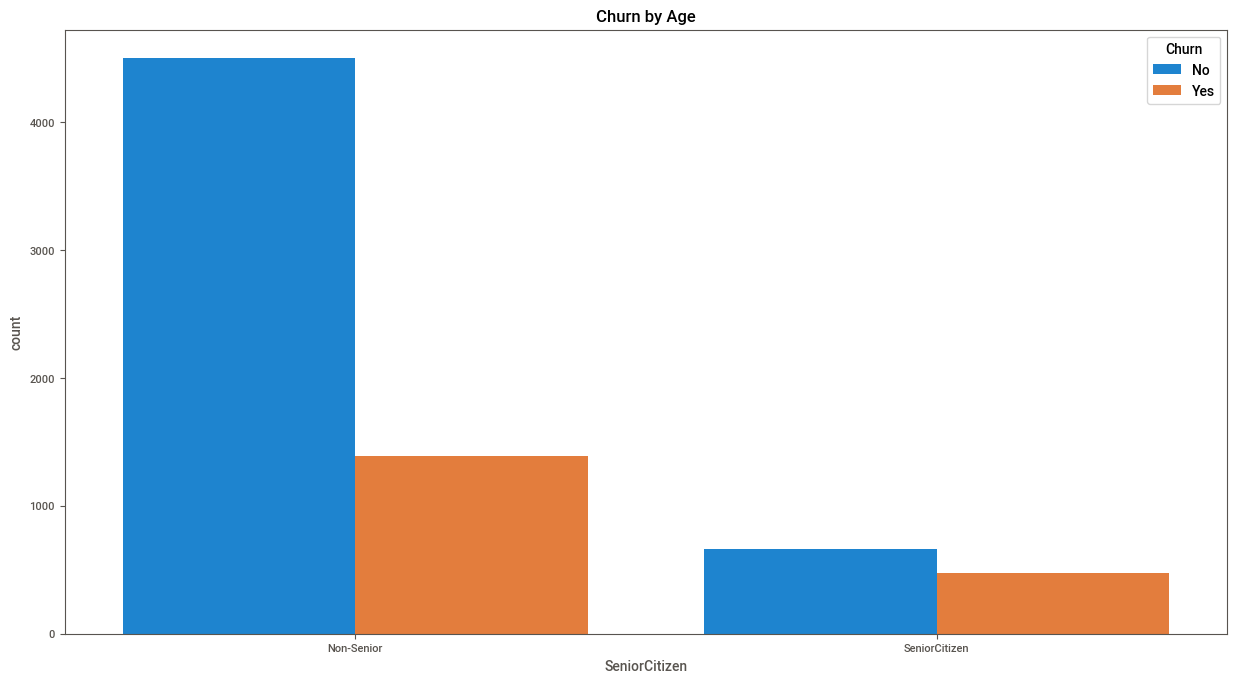

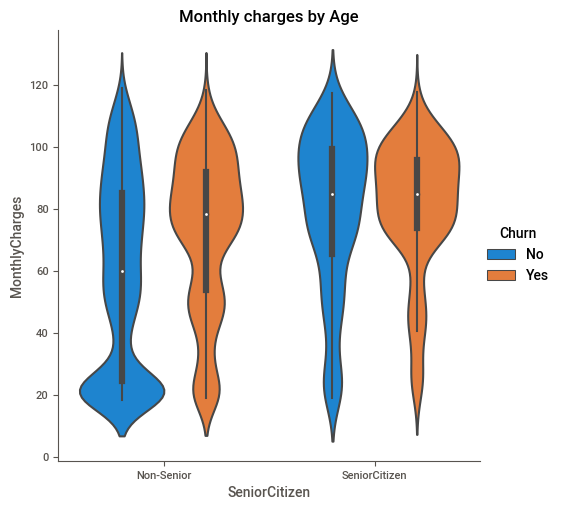

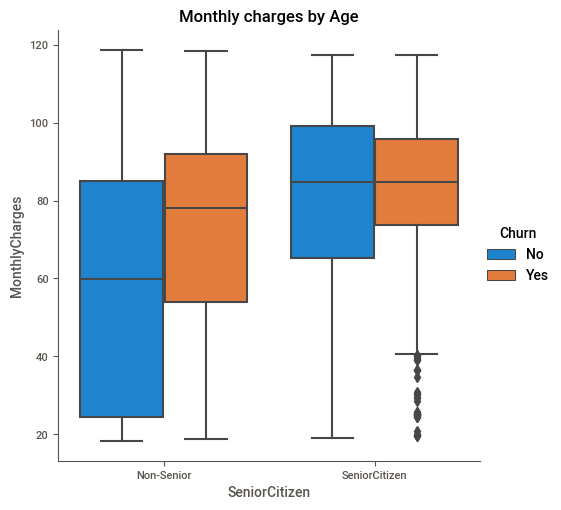

In [161]:
#percentage of Seniors And Non-Seniors
fig1 = go.Figure(
    data=go.Pie(values=data['SeniorCitizen'].value_counts().values,labels=data['SeniorCitizen'].value_counts().index,title='percentage of Seniors And Non-Seniors'))
fig1.show()

#citizen count
sns.countplot(data=data,x='SeniorCitizen',hue='Churn').set(title='Churn by Age')

#monthly charges by age
sns.catplot(data=data,x='SeniorCitizen',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Age')
rcParams['figure.figsize'] = 15,8

#monthly charges by age
sns.catplot(data=data,x='SeniorCitizen',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by Age')
rcParams['figure.figsize'] = 15,8

* Only 16% of the people in our dataset are seniors, which is much smaller than the non-senior population.

* Overall, non-senior citizens leave more frequently than seniors do.

**1.4 What is the percentage or number of those with partner and those without partner?**

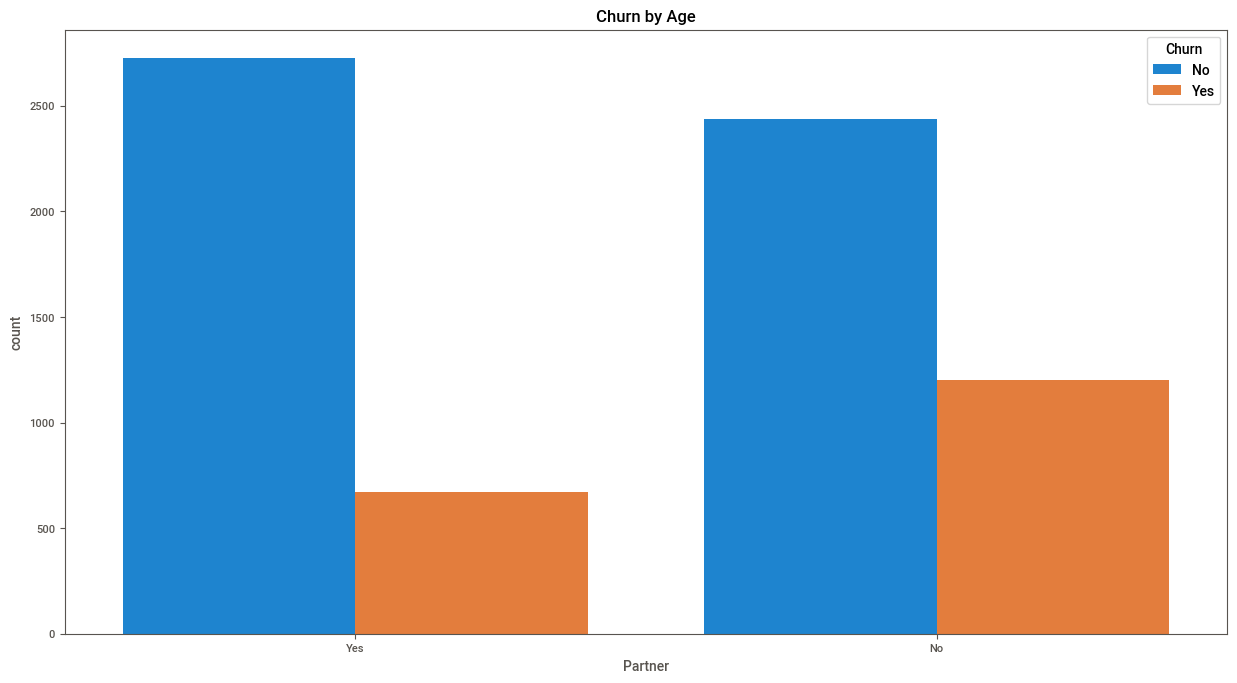

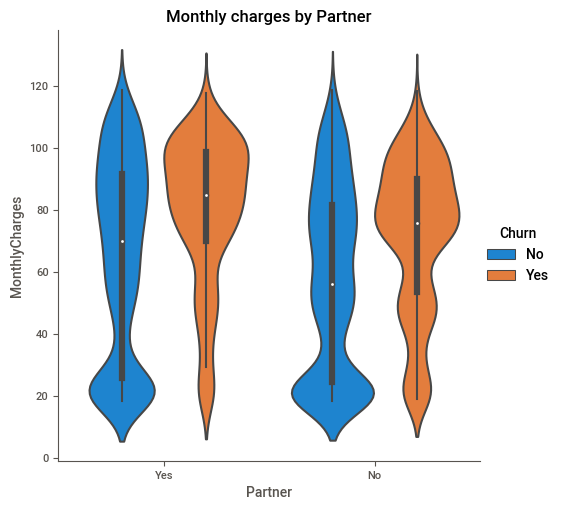

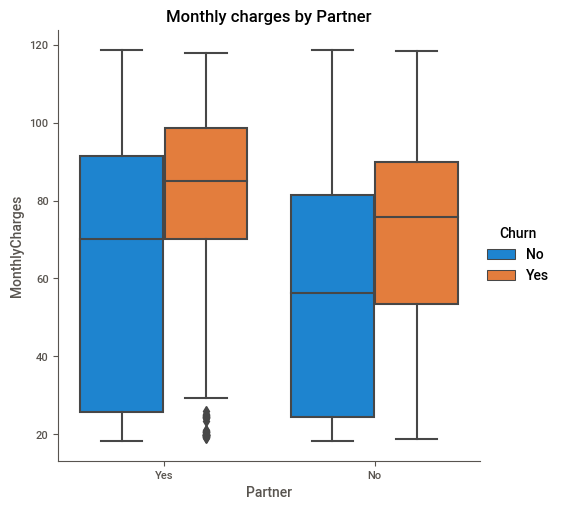

In [162]:
#percentage of those with partners and those without partner

fig1 = go.Figure(
    data=go.Pie(values=data['Partner'].value_counts().values,labels=data['Partner'].value_counts().index,title='percentage of those with partners and those without partner'))
fig1.show()

#citizen count
sns.countplot(data=data,x='Partner',hue='Churn').set(title='Churn by Age')

#monthly charges by age
sns.catplot(data=data,x='Partner',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Partner')
rcParams['figure.figsize'] = 15,8


#monthly charges by age
sns.catplot(data=data,x='Partner',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by Partner')
rcParams['figure.figsize'] = 15,8

In general, people without partners churn more frequently than those who do.

**1.5 Those who  has dependents and those who don't have ,who churn most?**

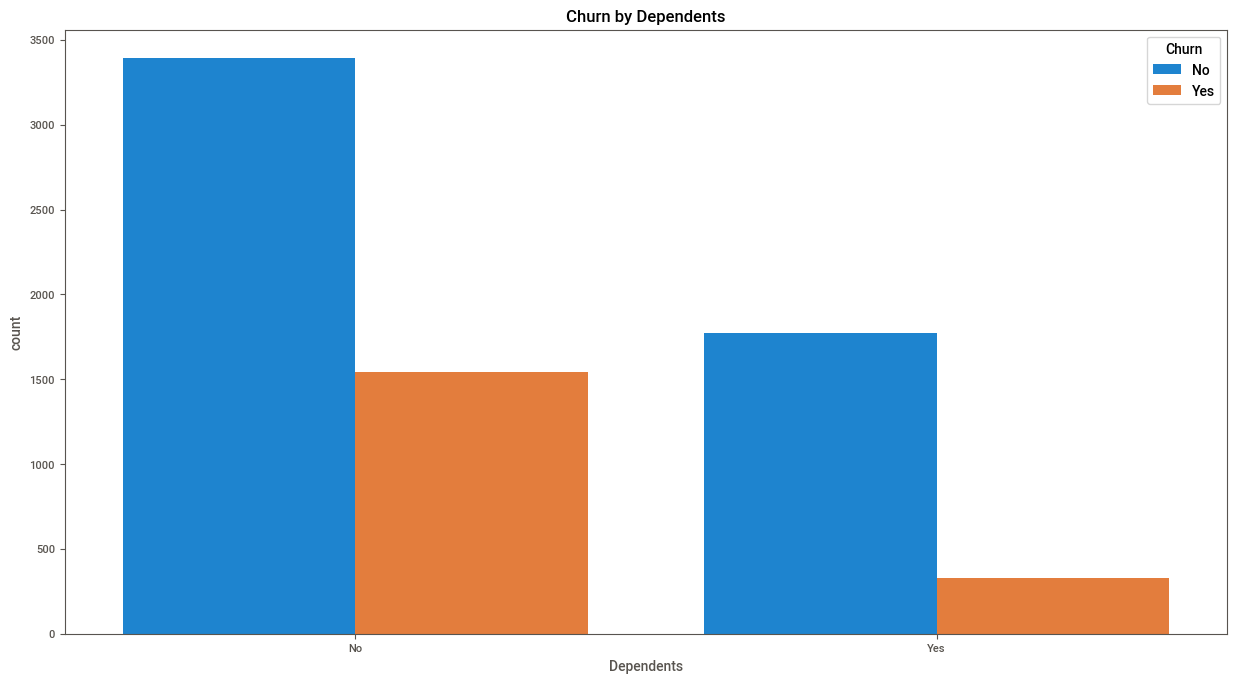

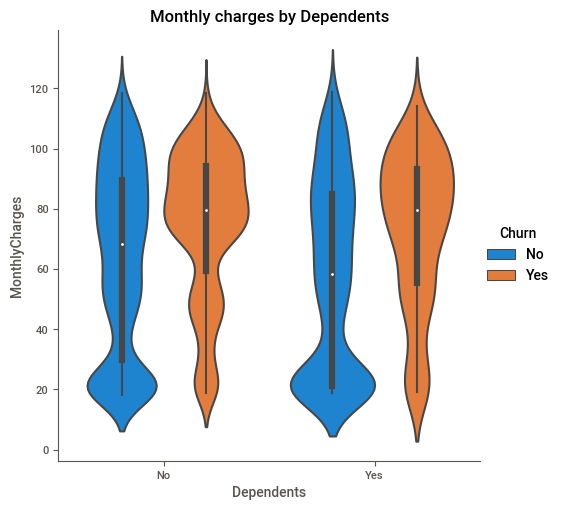

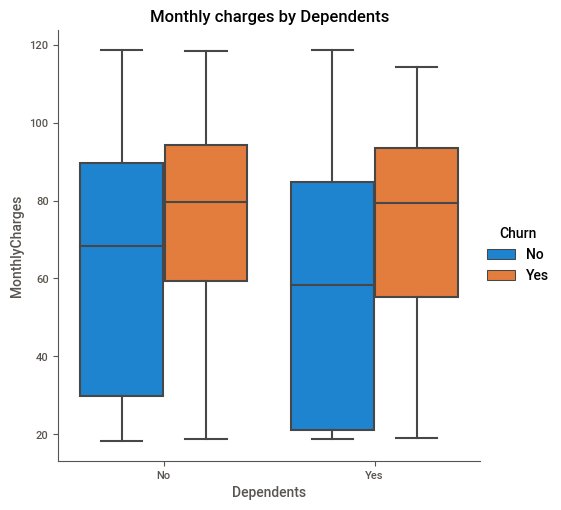

In [163]:
#percentage of those who has dependents and those who don't have
fig1 = go.Figure(
    data=go.Pie(values=data['Dependents'].value_counts().values,labels=data['Dependents'].value_counts().index,title='Dependents composition of overall data'))
fig1.show()


#Partner count by churn

sns.countplot(data=data,x='Dependents',hue='Churn').set(title='Churn by Dependents')
rcParams['figure.figsize'] = 15,8


#monthly charges by Partner
sns.catplot(data=data,x='Dependents',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Dependents')
rcParams['figure.figsize'] = 15,8
plt.show()

#monthly charges by Partner
sns.catplot(data=data,x='Dependents',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by Dependents')
rcParams['figure.figsize'] = 15,8
plt.show()

* Those without dependents are more than those with dependents
* Customers who don't have Dependents are more likely to leave than those who do

**1.6 What is the of number  people churn by InternetService?**

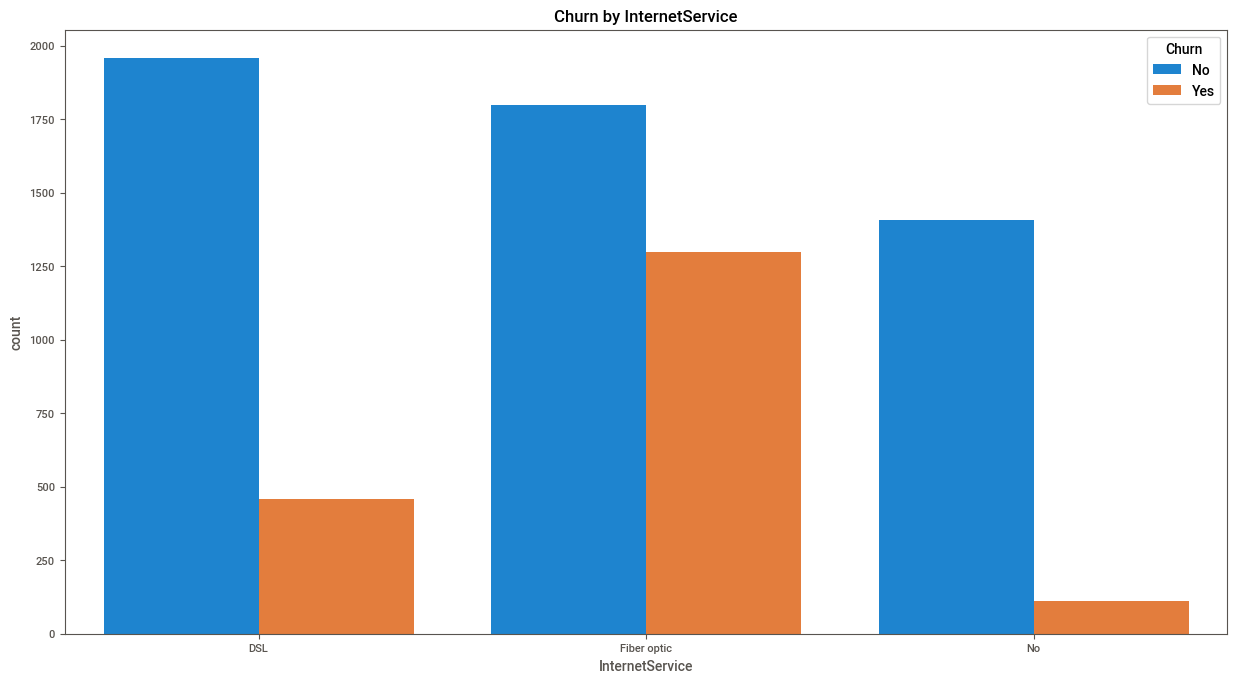

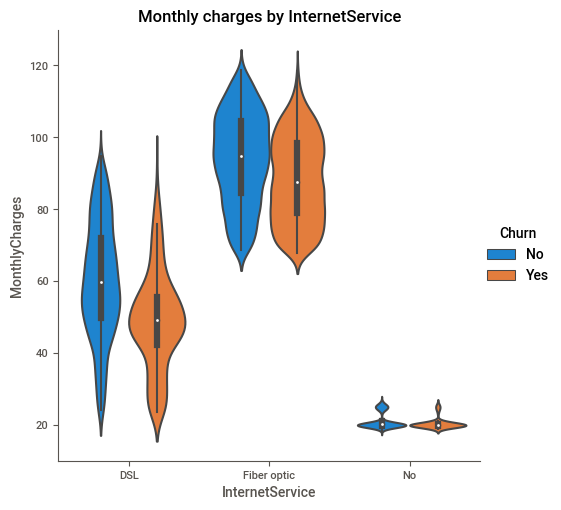

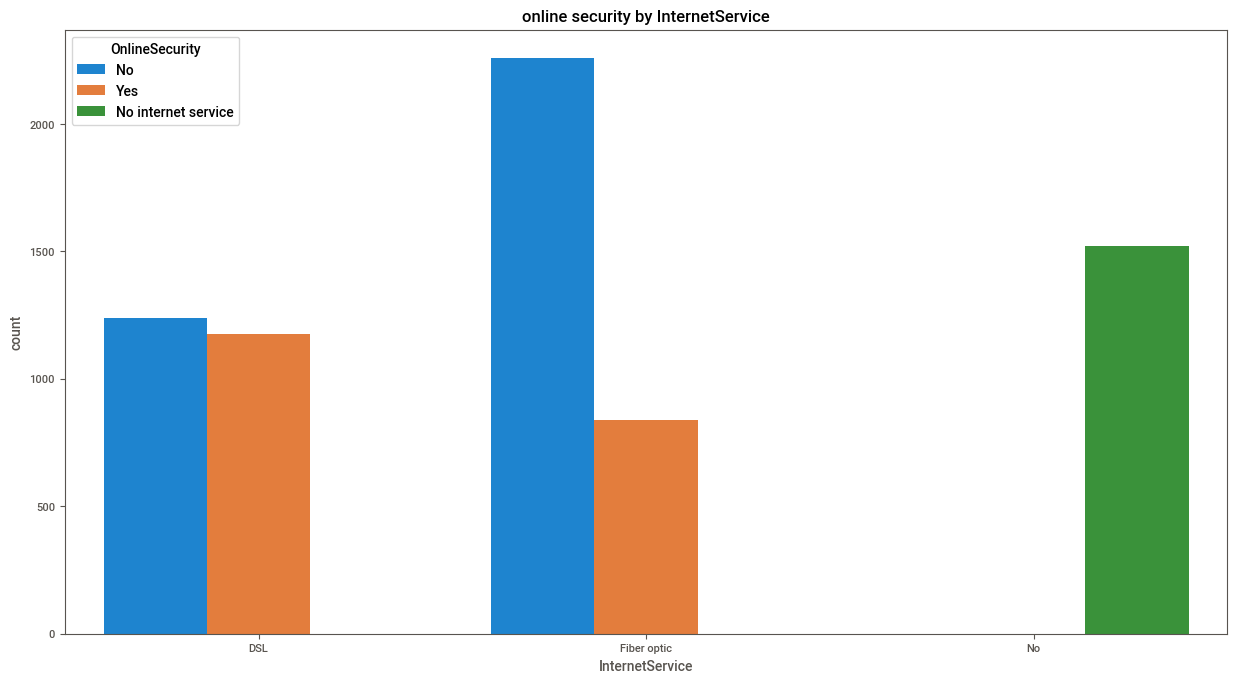

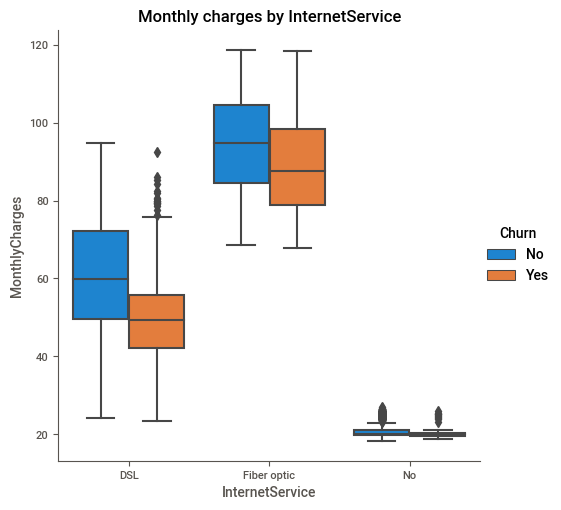

In [169]:
#InternetService composition of customers
fig1 = go.Figure(
    data=go.Pie(values=data['InternetService'].value_counts().values,labels=data['InternetService'].value_counts().index,title='InternetService composition of customers'))
fig1.show()


#InternetService count by churn

sns.countplot(data=data,x='InternetService' ,hue='Churn').set(title='Churn by InternetService')
rcParams['figure.figsize'] = 15,8




#monthly charges by InternetService
sns.catplot(data=data,x='InternetService',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by InternetService')
rcParams['figure.figsize'] = 15,8
plt.show()

#InternetService count by online security

sns.countplot(data=data,x='InternetService' ,hue='OnlineSecurity').set(title='online security by InternetService')
rcParams['figure.figsize'] = 15,8

#monthly charges by InternetService
sns.catplot(data=data,x='InternetService',y= 'MonthlyCharges', kind='box',hue='Churn').set(title='Monthly charges by InternetService')
rcParams['figure.figsize'] = 15,8
plt.show()

* Most customers are using fiber optic InternetService
* customers who use fiber optic InternetService are more likely to leave than those who DSL and does not use InternetService all
* Those using  fiber optic InternetService are with high monthly charges 
* Those using fiber optic InternetService are with a very poor online security

**1.7 What is the number of people churn by Contract type?**


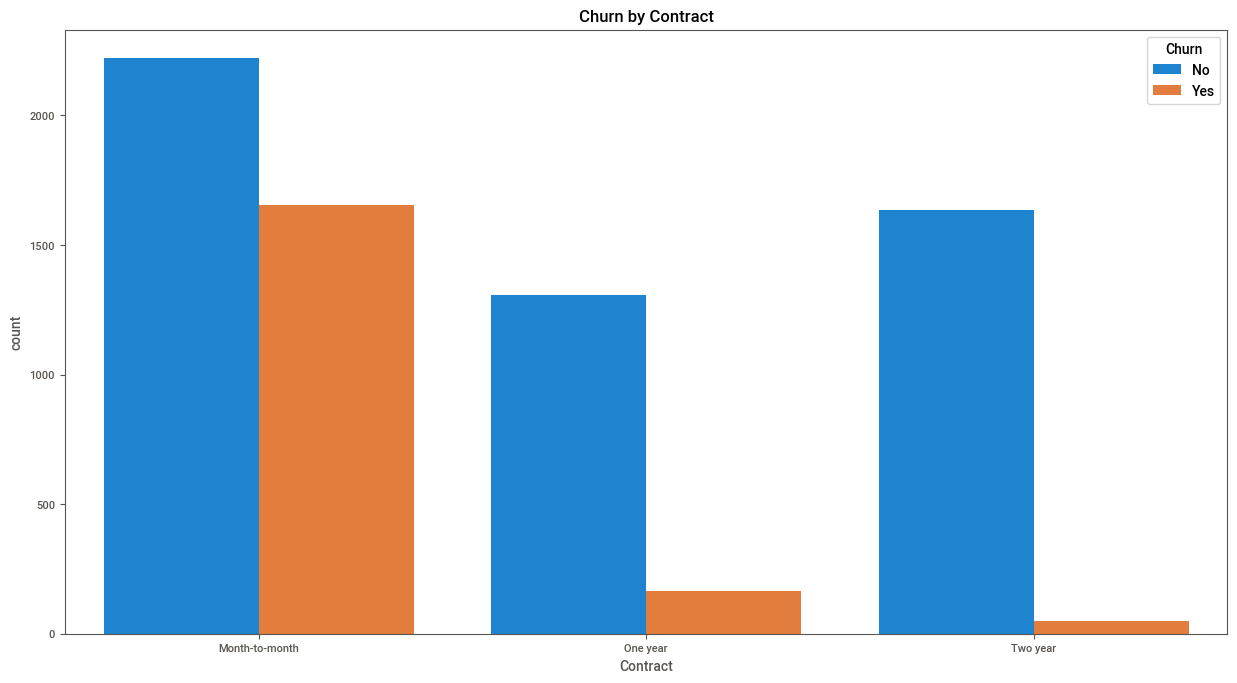

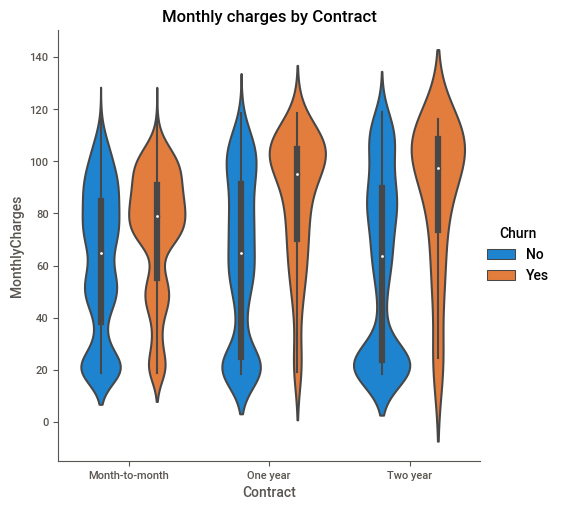

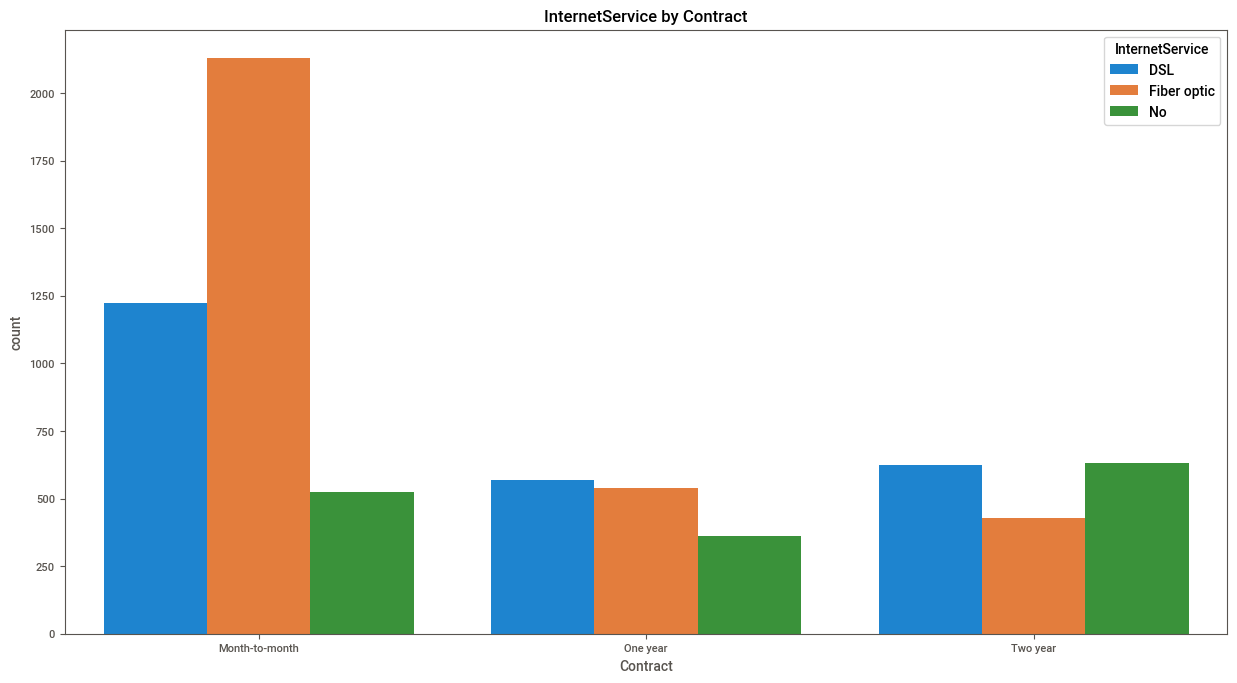

In [170]:
#Contract composition of customers
fig1 = go.Figure(
    data=go.Pie(values=data['Contract'].value_counts().values,labels=data['Contract'].value_counts().index,title='Contract composition of customers'))
fig1.show()


#Contract count by churn

sns.countplot(data=data,x='Contract',hue='Churn').set(title='Churn by Contract')
rcParams['figure.figsize'] = 15,8


#monthly charges by Contract
sns.catplot(data=data,x='Contract',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by Contract')
rcParams['figure.figsize'] = 15,8
plt.show()

#Contract count by InternetService

sns.countplot(data=data,x='Contract',hue='InternetService').set(title='InternetService by Contract')
rcParams['figure.figsize'] = 15,8

* According to the pie chart more than half of customers use a monthly payment option
* Customers churn far more frequently on monthly contracts.
* The churn rate is lower the longer the plan is.
* The longer the contract, the greater the monthly payments.
* Those with Month-to-Month contract use Fibre optics most

**1.8 What is the number of people churn by PaperlessBilling?**

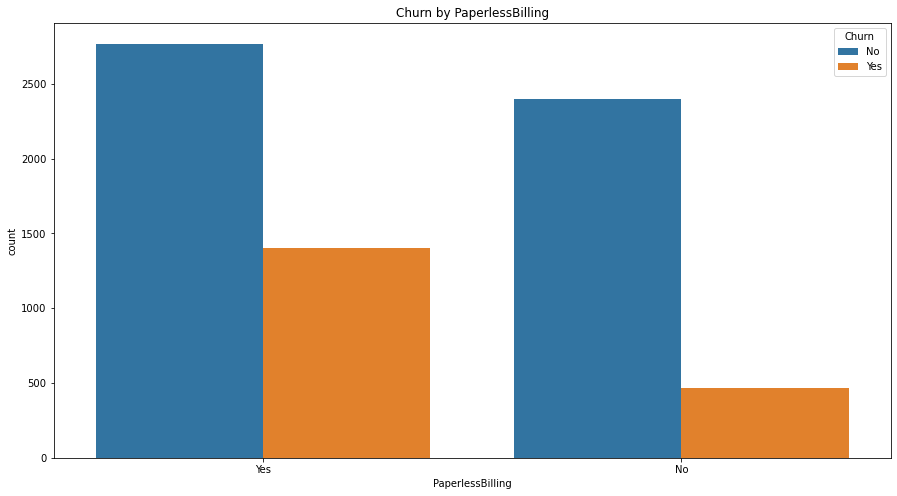

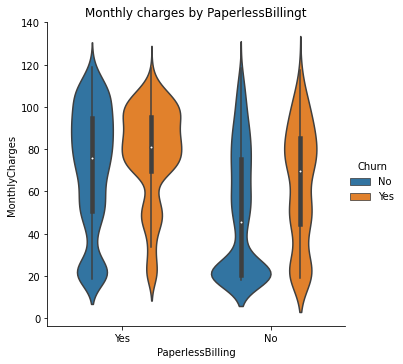

In [31]:
#PaperlessBilling composition of customers
fig1 = go.Figure(
    data=go.Pie(values=data['PaperlessBilling'].value_counts().values,labels=data['PaperlessBilling'].value_counts().index,title='PaperlessBilling composition'))
fig1.show()


#PaperlessBilling count by churn

sns.countplot(data=data,x='PaperlessBilling' ,hue='Churn').set(title='Churn by PaperlessBilling')
rcParams['figure.figsize'] = 15,8


#monthly charges by PaperlessBilling
sns.catplot(data=data,x='PaperlessBilling',y= 'MonthlyCharges', kind='violin',hue='Churn').set(title='Monthly charges by PaperlessBillingt')
rcParams['figure.figsize'] = 15,8
plt.show()

* Non-paperless billing clients churn a little  higher than paperless billing subscribers.

In [32]:
#Copying df dataframe for visualization of services
copy = df.copy()
copy

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  grouped_tenure  
0            29.85    No     less_than_1  
1          1889.50    No     less_than_3  
2           108.15   Yes     less_than_1  
3          1840.75    No     less_than_4  
4           151.65   Yes     less_than_1  
...            ...   ...             ...  
7038       1990.50    No     less_than_2  
7039       7362.90    No  greater_than_5  
7040        346.45    No     less_than_1  
7041        306.60   Yes     less_than_1  
7042       6844.50    No  greater_than_5  

[7032

# Visualization of other services

In [33]:

def plot_services(df):
    copy = df[df.InternetService != 'No']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.OnlineSecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.OnlineBackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.DeviceProtection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.TechSupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.StreamingTV.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(266)
    plt.pie(copy.StreamingMovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(267)
    copy1 = copy[copy.OnlineSecurity == 'Yes']
    plt.pie(copy1.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(268)
    copy2 = copy[copy.OnlineBackup == 'Yes']
    plt.pie(copy2.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(269)
    copy3 = copy[copy.DeviceProtection == 'Yes']
    plt.pie(copy3.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.TechSupport == 'Yes']
    plt.pie(copy4.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.StreamingTV == 'Yes']
    plt.pie(copy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.StreamingMovies == 'Yes']
    plt.pie(copy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()

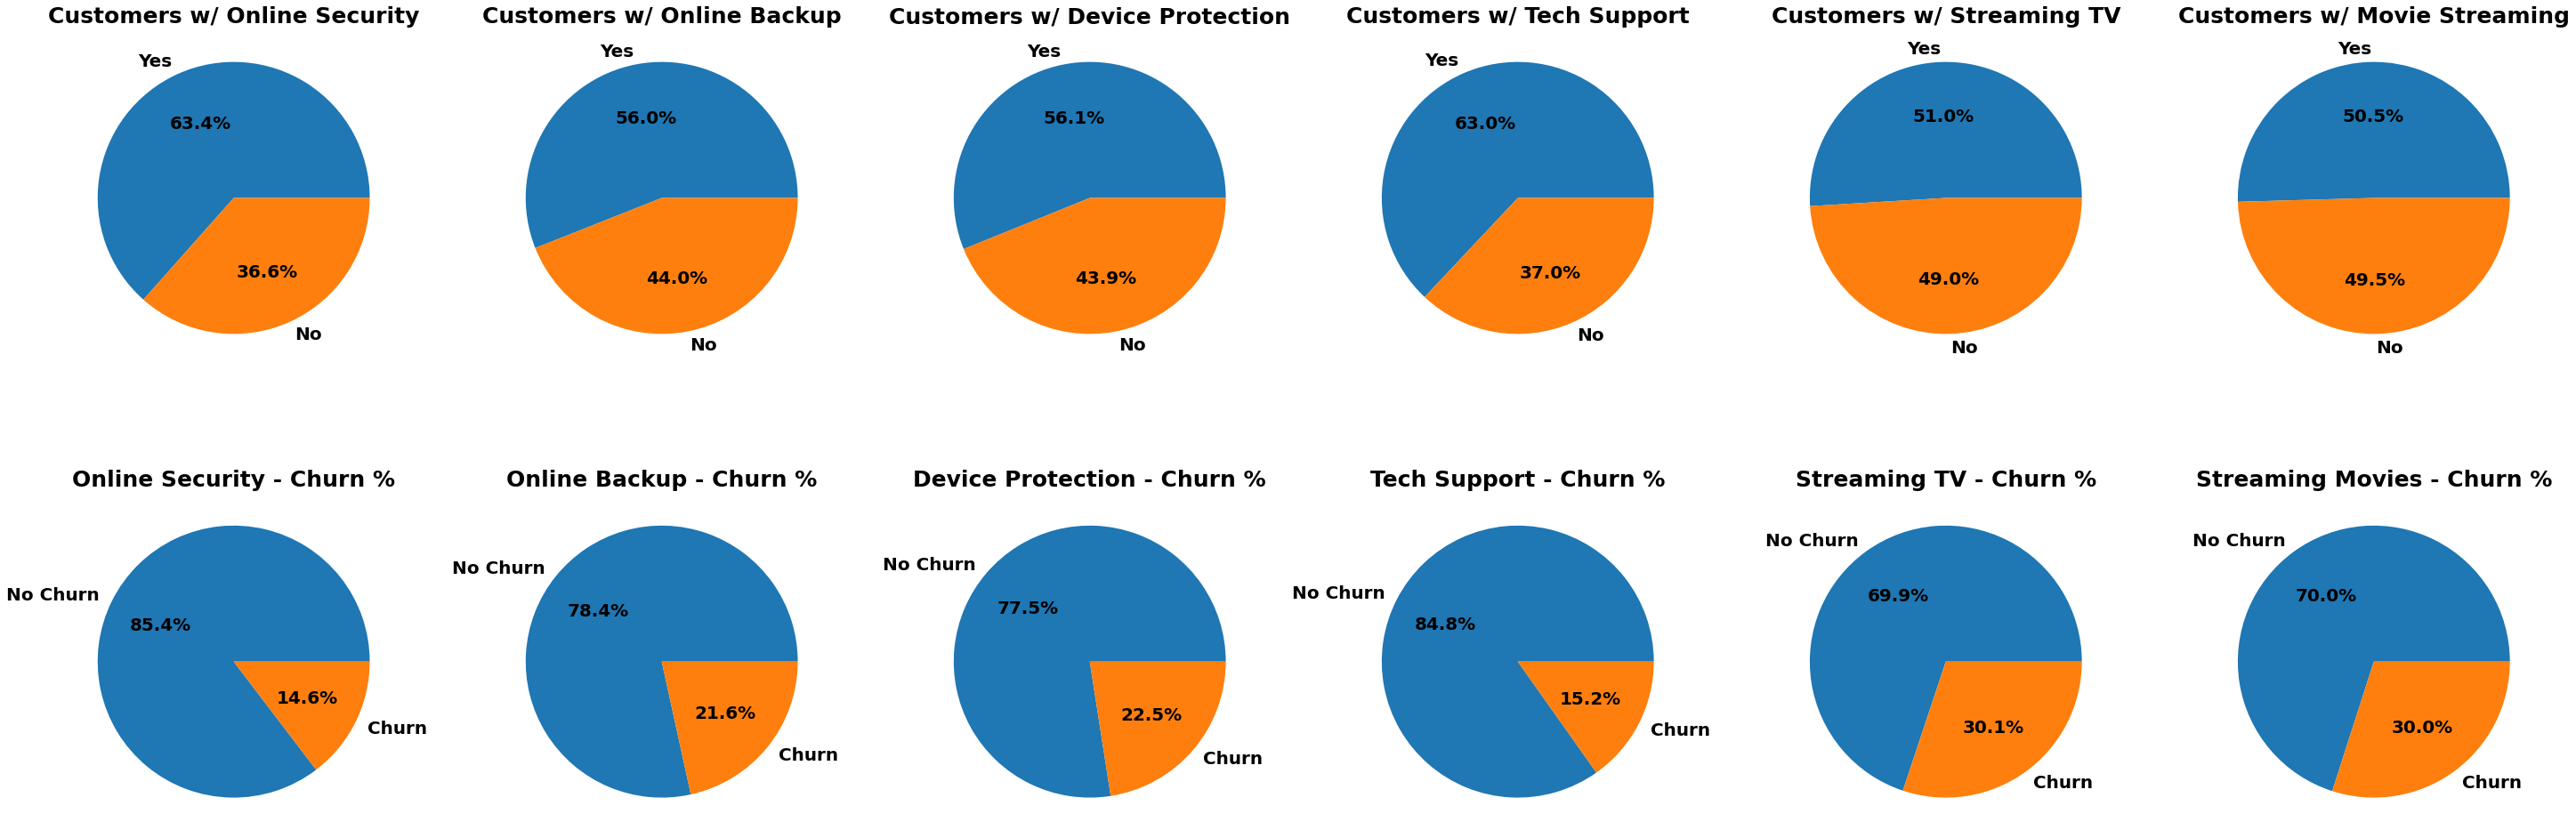

In [34]:
plot_services(df)

* Customers with TV Streaming and/or Movie streaming services churn more than all other services.

# Feature engineering

In [35]:
data

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female     Non-Senior     Yes         No       1           No   
1       Male     Non-Senior      No         No      34          Yes   
2       Male     Non-Senior      No         No       2          Yes   
3       Male     Non-Senior      No         No      45           No   
4     Female     Non-Senior      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male     Non-Senior     Yes        Yes      24          Yes   
7039  Female     Non-Senior     Yes        Yes      72          Yes   
7040  Female     Non-Senior     Yes        Yes      11           No   
7041    Male  SeniorCitizen     Yes         No       4          Yes   
7042    Male     Non-Senior      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [36]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown='error')
    
    #categories='gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod', drop='first')

In [43]:
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (ohe,['gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling',
          'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn']),
    remainder='passthrough')

In [44]:
final_data_encoded = transformer.fit_transform(data)
final_data_encoded = pd.DataFrame(final_data_encoded, columns= transformer.get_feature_names_out())
final_data_encoded

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
0                            0.0                                         0.0   
1                            1.0                                         0.0   
2                            1.0                                         0.0   
3                            1.0                                         0.0   
4                            0.0                                         0.0   
...                          ...                                         ...   
7027                         1.0                                         0.0   
7028                         0.0                                         0.0   
7029                         0.0                                         0.0   
7030                         1.0                                         1.0   
7031                         1.0                                         0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
...                          ...                            ...   
7027                         1.0                            1.0   
7028                         1.0                            1.0   
7029                         1.0                            1.0   
7030                         1.0                            0.0   
7031                         0.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
0                                 0.0                                  1.0   
1                                 1.0                                  0.0   
2                                 1.0                                  1.0   
3                                 0.0                                  0.0   
4                                 1.0                                  1.0   
...                               ...                                  ...   
7027                              1.0                                  1.0   
7028                              1.0                                  1.0   
7029                              0.0                                  1.0   
7030                              1.0                                  1.0   
7031                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               1.0   
4                                               0.0   
...                                             ...   
7027                                            0.0   
7028                                            0.0   
7029                                            1.0   
7030                                            0.0   
7031                                            0.0   

      onehotencoder__MultipleLines_Yes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
7027                               1.0   
7028                               1.0   
7029                               0.0   
7030                               1.0   
7031                               0.0   

      onehotencoder__InternetService_Fiber optic  \
0                                            0.0   
1                                

In [45]:

final_data_encoded.rename(columns={'onehotencoder__Churn_Yes': 'Churn'},inplace=True)
final_data_encoded

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
0                            0.0                                         0.0   
1                            1.0                                         0.0   
2                            1.0                                         0.0   
3                            1.0                                         0.0   
4                            0.0                                         0.0   
...                          ...                                         ...   
7027                         1.0                                         0.0   
7028                         0.0                                         0.0   
7029                         0.0                                         0.0   
7030                         1.0                                         1.0   
7031                         1.0                                         0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
...                          ...                            ...   
7027                         1.0                            1.0   
7028                         1.0                            1.0   
7029                         1.0                            1.0   
7030                         1.0                            0.0   
7031                         0.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
0                                 0.0                                  1.0   
1                                 1.0                                  0.0   
2                                 1.0                                  1.0   
3                                 0.0                                  0.0   
4                                 1.0                                  1.0   
...                               ...                                  ...   
7027                              1.0                                  1.0   
7028                              1.0                                  1.0   
7029                              0.0                                  1.0   
7030                              1.0                                  1.0   
7031                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               1.0   
4                                               0.0   
...                                             ...   
7027                                            0.0   
7028                                            0.0   
7029                                            1.0   
7030                                            0.0   
7031                                            0.0   

      onehotencoder__MultipleLines_Yes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
7027                               1.0   
7028                               1.0   
7029                               0.0   
7030                               1.0   
7031                               0.0   

      onehotencoder__InternetService_Fiber optic  \
0                                            0.0   
1                                

In [46]:
# Profiling the final dataframe with SweetViz
final_df_report = sv.analyze(final_data_encoded)
final_df_report.show_html(filepath= "final_df_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report final_df_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Standardization

In [47]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [48]:
#creating a list for columns
col_list3 = ['remainder__tenure','remainder__TotalCharges','remainder__MonthlyCharges']

In [49]:
# create scaler
scaler = StandardScaler()

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
final_data_encoded[col_list3] = scaler.fit_transform(final_data_encoded[col_list3])

In [53]:
final_data_encoded

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
0                            0.0                                         0.0   
1                            1.0                                         0.0   
2                            1.0                                         0.0   
3                            1.0                                         0.0   
4                            0.0                                         0.0   
...                          ...                                         ...   
7027                         1.0                                         0.0   
7028                         0.0                                         0.0   
7029                         0.0                                         0.0   
7030                         1.0                                         1.0   
7031                         1.0                                         0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
...                          ...                            ...   
7027                         1.0                            1.0   
7028                         1.0                            1.0   
7029                         1.0                            1.0   
7030                         1.0                            0.0   
7031                         0.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
0                                 0.0                                  1.0   
1                                 1.0                                  0.0   
2                                 1.0                                  1.0   
3                                 0.0                                  0.0   
4                                 1.0                                  1.0   
...                               ...                                  ...   
7027                              1.0                                  1.0   
7028                              1.0                                  1.0   
7029                              0.0                                  1.0   
7030                              1.0                                  1.0   
7031                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               1.0   
4                                               0.0   
...                                             ...   
7027                                            0.0   
7028                                            0.0   
7029                                            1.0   
7030                                            0.0   
7031                                            0.0   

      onehotencoder__MultipleLines_Yes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
7027                               1.0   
7028                               1.0   
7029                               0.0   
7030                               1.0   
7031                               0.0   

      onehotencoder__InternetService_Fiber optic  \
0                                            0.0   
1                                

# Split data into Predictor and Response Variable¶

In [54]:
y=final_data_encoded['Churn']
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: Churn, Length: 7032, dtype: float64

In [55]:
X=final_data_encoded.drop(final_data_encoded.columns[[27]], axis=1, inplace=False)
X

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
0                            0.0                                         0.0   
1                            1.0                                         0.0   
2                            1.0                                         0.0   
3                            1.0                                         0.0   
4                            0.0                                         0.0   
...                          ...                                         ...   
7027                         1.0                                         0.0   
7028                         0.0                                         0.0   
7029                         0.0                                         0.0   
7030                         1.0                                         1.0   
7031                         1.0                                         0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
...                          ...                            ...   
7027                         1.0                            1.0   
7028                         1.0                            1.0   
7029                         1.0                            1.0   
7030                         1.0                            0.0   
7031                         0.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
0                                 0.0                                  1.0   
1                                 1.0                                  0.0   
2                                 1.0                                  1.0   
3                                 0.0                                  0.0   
4                                 1.0                                  1.0   
...                               ...                                  ...   
7027                              1.0                                  1.0   
7028                              1.0                                  1.0   
7029                              0.0                                  1.0   
7030                              1.0                                  1.0   
7031                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               1.0   
4                                               0.0   
...                                             ...   
7027                                            0.0   
7028                                            0.0   
7029                                            1.0   
7030                                            0.0   
7031                                            0.0   

      onehotencoder__MultipleLines_Yes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
7027                               1.0   
7028                               1.0   
7029                               0.0   
7030                               1.0   
7031                               0.0   

      onehotencoder__InternetService_Fiber optic  \
0                                            0.0   
1                                

# Split Data into Train and Test Data

In [56]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [57]:
#putting training datasets together for modelling
train_data = X_train.join(y_train, on= X_train.index)
train_data.head()

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
4491                         0.0                                         0.0   
1928                         1.0                                         0.0   
4660                         0.0                                         0.0   
5672                         0.0                                         1.0   
3604                         0.0                                         0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
4491                         0.0                            1.0   
1928                         0.0                            0.0   
4660                         0.0                            1.0   
5672                         1.0                            0.0   
3604                         0.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
4491                              1.0                                  1.0   
1928                              1.0                                  1.0   
4660                              1.0                                  1.0   
5672                              1.0                                  0.0   
3604                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
4491                                            0.0   
1928                                            0.0   
4660                                            0.0   
5672                                            0.0   
3604                                            0.0   

      onehotencoder__MultipleLines_Yes  \
4491                               1.0   
1928                               0.0   
4660                               0.0   
5672                               0.0   
3604                               1.0   

      onehotencoder__InternetService_Fiber optic  \
4491                                         1.0   
1928                                         0.0   
4660                                         0.0   
5672                                         0.0   
3604                                         1.0   

      onehotencoder__InternetService_No  \
4491                                0.0   
1928                                1.0   
4660                                0.0   
5672                                0.0   
3604                                0.0   

      onehotencoder__OnlineSecurity_No internet service  \
4491                                                0.0   
1928                                                1.0   
4660                                                0.0   
5672                                                0.0   
3604                                                0.0   

      onehotencoder__OnlineSecurity_Yes  \
4491                                1.0   
1928                                0.0   
4660                                1.0   
5672                                0.0   
3604                                0.0   

      onehotencoder__OnlineBackup_No internet service  \
4491                                              0.0   
1928                                              1.0   
4660                                              0.0   
5672                                              0.0   
3604                                              0.0   

      onehotencoder__OnlineBackup_Yes  \
4491                              0.0   
1928                              0.0   
4660                              0.0   
5672                              0.0   
3604                              0.0   

      onehotencoder__DeviceProtection_No internet service  \
4491                                                0.0     
1928                                                1.0     
4660                                                0.0     
5672                                             

In [58]:
train_data.shape

(4922, 31)

In [59]:
#putting testing datasets together for modelling
test_data = X_test.join(y_test, on= X_test.index)
test_data.head()

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
4214                         1.0                                         0.0   
1815                         0.0                                         0.0   
2370                         0.0                                         1.0   
5453                         1.0                                         0.0   
1786                         0.0                                         0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
4214                         0.0                            0.0   
1815                         1.0                            0.0   
2370                         1.0                            0.0   
5453                         1.0                            0.0   
1786                         1.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
4214                              1.0                                  0.0   
1815                              1.0                                  0.0   
2370                              1.0                                  1.0   
5453                              1.0                                  1.0   
1786                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
4214                                            0.0   
1815                                            0.0   
2370                                            0.0   
5453                                            0.0   
1786                                            0.0   

      onehotencoder__MultipleLines_Yes  \
4214                               0.0   
1815                               0.0   
2370                               0.0   
5453                               1.0   
1786                               0.0   

      onehotencoder__InternetService_Fiber optic  \
4214                                         0.0   
1815                                         0.0   
2370                                         1.0   
5453                                         0.0   
1786                                         0.0   

      onehotencoder__InternetService_No  \
4214                                1.0   
1815                                0.0   
2370                                0.0   
5453                                0.0   
1786                                0.0   

      onehotencoder__OnlineSecurity_No internet service  \
4214                                                1.0   
1815                                                0.0   
2370                                                0.0   
5453                                                0.0   
1786                                                0.0   

      onehotencoder__OnlineSecurity_Yes  \
4214                                0.0   
1815                                0.0   
2370                                1.0   
5453                                0.0   
1786                                1.0   

      onehotencoder__OnlineBackup_No internet service  \
4214                                              1.0   
1815                                              0.0   
2370                                              0.0   
5453                                              0.0   
1786                                              0.0   

      onehotencoder__OnlineBackup_Yes  \
4214                              0.0   
1815                              0.0   
2370                              1.0   
5453                              1.0   
1786                              1.0   

      onehotencoder__DeviceProtection_No internet service  \
4214                                                1.0     
1815                                                0.0     
2370                                                0.0     
5453                                             

In [60]:
test_data.shape

(2110, 31)

In [61]:
 #Seeing the split across training and testing datasets
print('Number of records in the original dataset: ', len(y))
print('Number of records in the training dataset: ', len(y_train))
print('Number of records in the testing dataset: ', len(y_test))

Number of records in the original dataset:  7032
Number of records in the training dataset:  4922
Number of records in the testing dataset:  2110


# Performing Smote Sampling 

In [62]:
# Creating a copy of the the final_data_encoded dataframe for the SMOTE
smote_data = final_data_encoded.copy()

In [63]:
y=smote_data['Churn']
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: Churn, Length: 7032, dtype: float64

In [64]:
X=smote_data.drop(final_data_encoded.columns[[27]], axis=1, inplace=False)
X

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
0                            0.0                                         0.0   
1                            1.0                                         0.0   
2                            1.0                                         0.0   
3                            1.0                                         0.0   
4                            0.0                                         0.0   
...                          ...                                         ...   
7027                         1.0                                         0.0   
7028                         0.0                                         0.0   
7029                         0.0                                         0.0   
7030                         1.0                                         1.0   
7031                         1.0                                         0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
...                          ...                            ...   
7027                         1.0                            1.0   
7028                         1.0                            1.0   
7029                         1.0                            1.0   
7030                         1.0                            0.0   
7031                         0.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
0                                 0.0                                  1.0   
1                                 1.0                                  0.0   
2                                 1.0                                  1.0   
3                                 0.0                                  0.0   
4                                 1.0                                  1.0   
...                               ...                                  ...   
7027                              1.0                                  1.0   
7028                              1.0                                  1.0   
7029                              0.0                                  1.0   
7030                              1.0                                  1.0   
7031                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               1.0   
4                                               0.0   
...                                             ...   
7027                                            0.0   
7028                                            0.0   
7029                                            1.0   
7030                                            0.0   
7031                                            0.0   

      onehotencoder__MultipleLines_Yes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
7027                               1.0   
7028                               1.0   
7029                               0.0   
7030                               1.0   
7031                               0.0   

      onehotencoder__InternetService_Fiber optic  \
0                                            0.0   
1                                

In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_sm, y_sm = sm.fit_resample(X,y)

In [66]:
y_sm.value_counts()

0.0    5163
1.0    5163
Name: Churn, dtype: int64

# Split Data into Train and Test Data

In [67]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train_res,X_test_res, y_train_res, y_test_res = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42, stratify=y_sm)

In [68]:
#Seeing the split across training and testing datasets
print('Number of records in the original dataset: ', len(y))
print('Number of records in the training dataset: ', len(y_train_res))
print('Number of records in the testing dataset: ', len(y_test_res))

Number of records in the original dataset:  7032
Number of records in the training dataset:  7744
Number of records in the testing dataset:  2582


In [69]:
np.unique(y_train_res ,return_counts = True)

(array([0., 1.]), array([3872, 3872], dtype=int64))

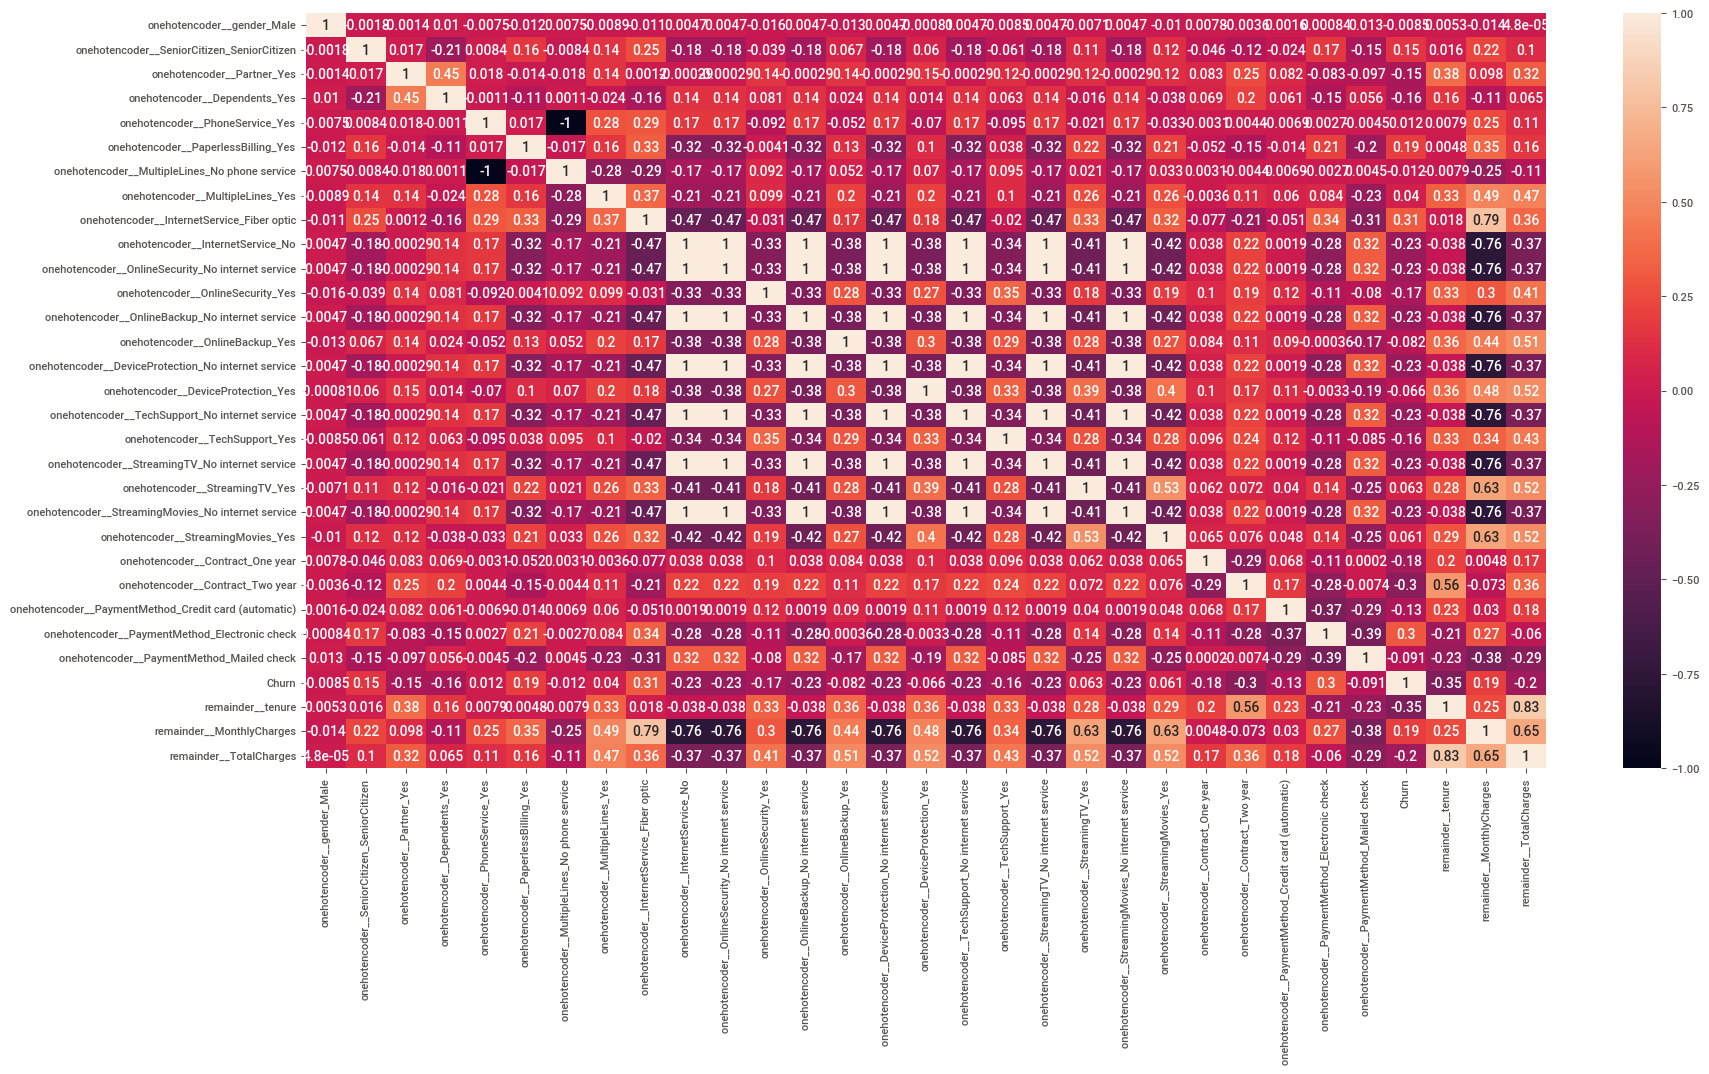

In [70]:
# Correlation
plt.figure(figsize = (20, 10))
sns.heatmap(final_data_encoded.corr(), annot = True);

# Model Building 

# 1. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(random_state = 24)
log_model=classifier1.fit(X_train_res, y_train_res)

In [72]:
#feature imporance of the logistic regression
reg_importance = log_model.coef_[0]
reg_importance = pd.DataFrame(reg_importance, index = X.columns)
reg_importance.reset_index(inplace = True)
reg_importance.rename(columns={'index':'Feature', 0 : 'Score'},inplace = True)
reg_importance.sort_values('Score',ascending= False, inplace=True)
reg_importance

#visualizing feature importance
figure= px.bar(reg_importance, x ='Feature', y= 'Score').update_xaxes(categoryorder='total descending')
figure.show()

In [73]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_res, y_train_res)

#predicting test set result
y_pred = logreg.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,y_pred)
prec = precision_score(y_test_res,y_pred)
rec = recall_score(y_test_res, y_pred)
f1 = f1_score(y_test_res,y_pred)
f2 = fbeta_score(y_test_res,y_pred,beta=2.0)

results = pd.DataFrame([['Logistics Regression',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results

Model  Accuracy  Precision   Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.82804  0.784587  0.810094

# Model Evaluation using Confusion Matrix

In [74]:
# import the metrics class
from sklearn import metrics

#defining confusion metrics
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix =pd.DataFrame(cnf_matrix).reset_index(drop =True)
cnf_matrix

0     1
0  926   365
1  222  1069

# Visualizing Confusion Matrix using Heatmap

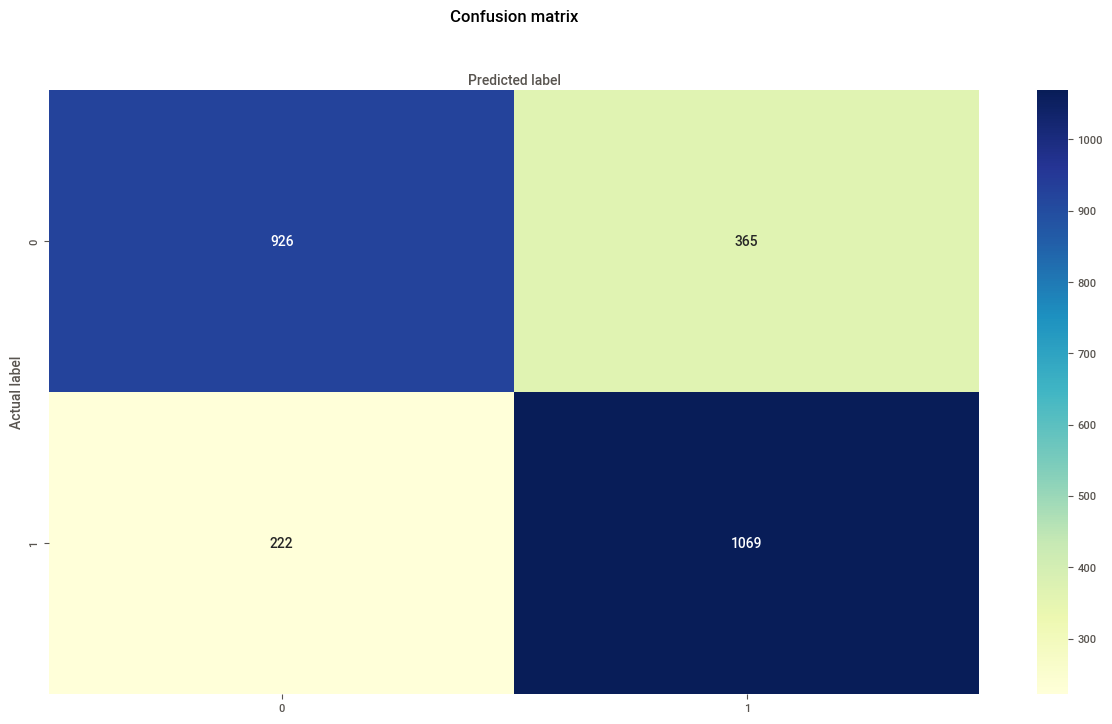

In [75]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 2. Support Vector Machine

In [76]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)

#predicting test set results
y_pred = clf.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,y_pred)
prec = precision_score(y_test_res,y_pred)
rec = recall_score(y_test_res , y_pred)
f1 = f1_score(y_test_res,y_pred)
f2 = fbeta_score(y_test_res,y_pred,beta=2.0)

Model_results = pd.DataFrame([['SVM',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

Model  Accuracy  Precision   Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.82804  0.784587  0.810094
1                   SVM  0.803641   0.778805  0.84818  0.812013  0.833333

# Model Evaluation Model_results using Confusion Matrix

In [77]:
#defining confusion metrics
cnf_matrix2 = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix2 =pd.DataFrame(cnf_matrix2).reset_index(drop =True)
cnf_matrix2

0     1
0  980   311
1  196  1095

# Visualizing Confusion Matrix using Heatmap

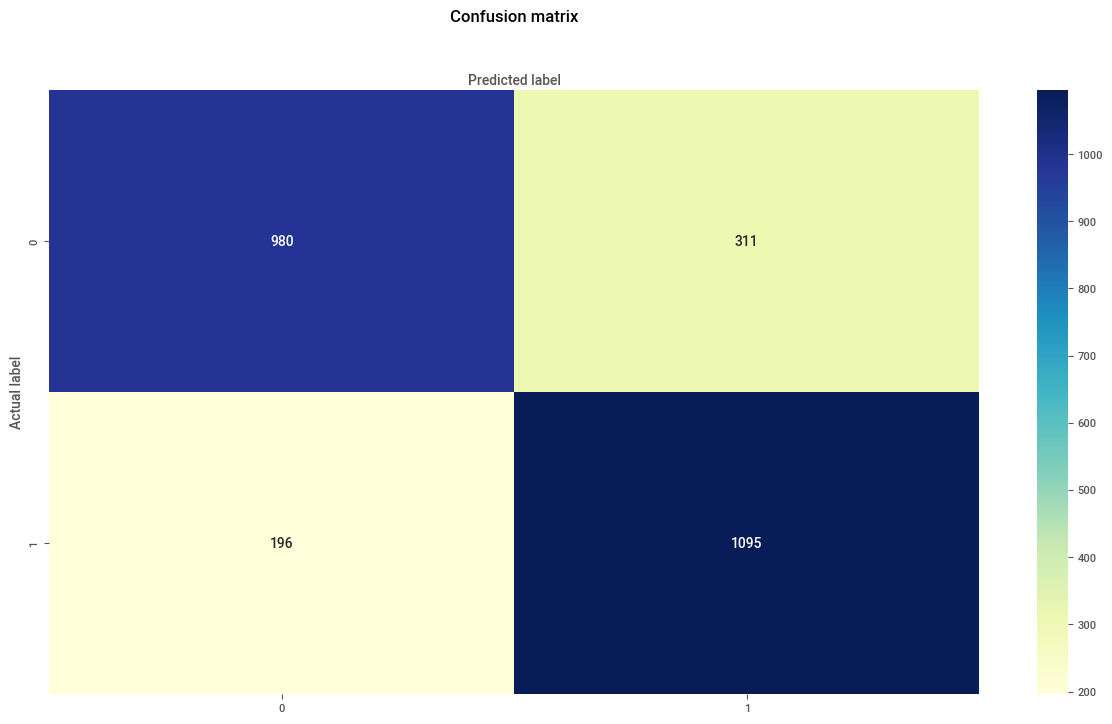

In [78]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix2, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 3. KNN

In [79]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Training the model using the training sets
knn.fit(X_train_res, y_train_res)

#Predicting the response for test dataset
y_pred = knn.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,y_pred)
prec = precision_score(y_test_res,y_pred)
rec = recall_score(y_test_res, y_pred)
f1 = f1_score(y_test_res,y_pred)
f2 = fbeta_score(y_test_res,y_pred,beta=2.0)

Model_results = pd.DataFrame([['KNN',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

Model  Accuracy  Precision    Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.828040  0.784587  0.810094
1                   SVM  0.803641   0.778805  0.848180  0.812013  0.833333
2                   KNN  0.783114   0.726596  0.907823  0.807163  0.864689

# Model Evaluation Model_results using Confusion Matrix

In [80]:
#defining confusion metrics
cnf_matrix3 = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix3 =pd.DataFrame(cnf_matrix3).reset_index(drop =True)
cnf_matrix3

0     1
0  850   441
1  119  1172

# Visualizing Confusion Matrix using Heatmap

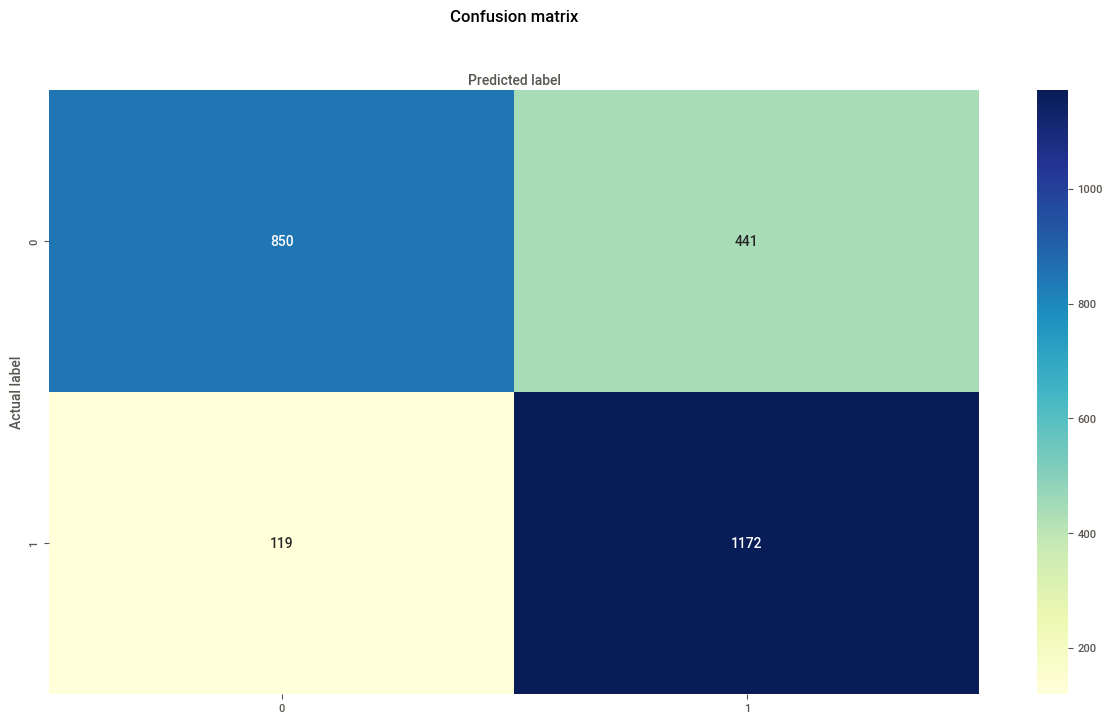

In [81]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix3, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

**Performance is poor so far, Let's train tree models on imbalance data**

# 4. Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer with train set
clf = clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,y_pred)
prec = precision_score(y_test_res,y_pred)
rec = recall_score(y_test_res , y_pred)
f1 = f1_score(y_test_res,y_pred)
f2 = fbeta_score(y_test_res,y_pred,beta=2.0)

Model_results = pd.DataFrame([['Decision Tree',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

Model  Accuracy  Precision    Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.828040  0.784587  0.810094
1                   SVM  0.803641   0.778805  0.848180  0.812013  0.833333
2                   KNN  0.783114   0.726596  0.907823  0.807163  0.864689
3         Decision Tree  0.776143   0.777432  0.773819  0.775621  0.774539

In [83]:
# Feature importances
dt_importance = clf.feature_importances_
dt_importance = pd.DataFrame(dt_importance, columns=["score"]).reset_index()
dt_importance["Feature"] = list(X.columns)
dt_importance.drop(columns=["index"], inplace=True)

dt_importance.sort_values(by="score",
                          ascending=False,
                          ignore_index=True,
                          inplace=True)

# Plotting the feature importances
fig = px.bar(dt_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [84]:
#defining confusion metrics
cnf_matrix4 = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix4 =pd.DataFrame(cnf_matrix4).reset_index(drop =True)
cnf_matrix4

0    1
0  1005  286
1   292  999

# Visualizing Confusion Matrix using Heatmap

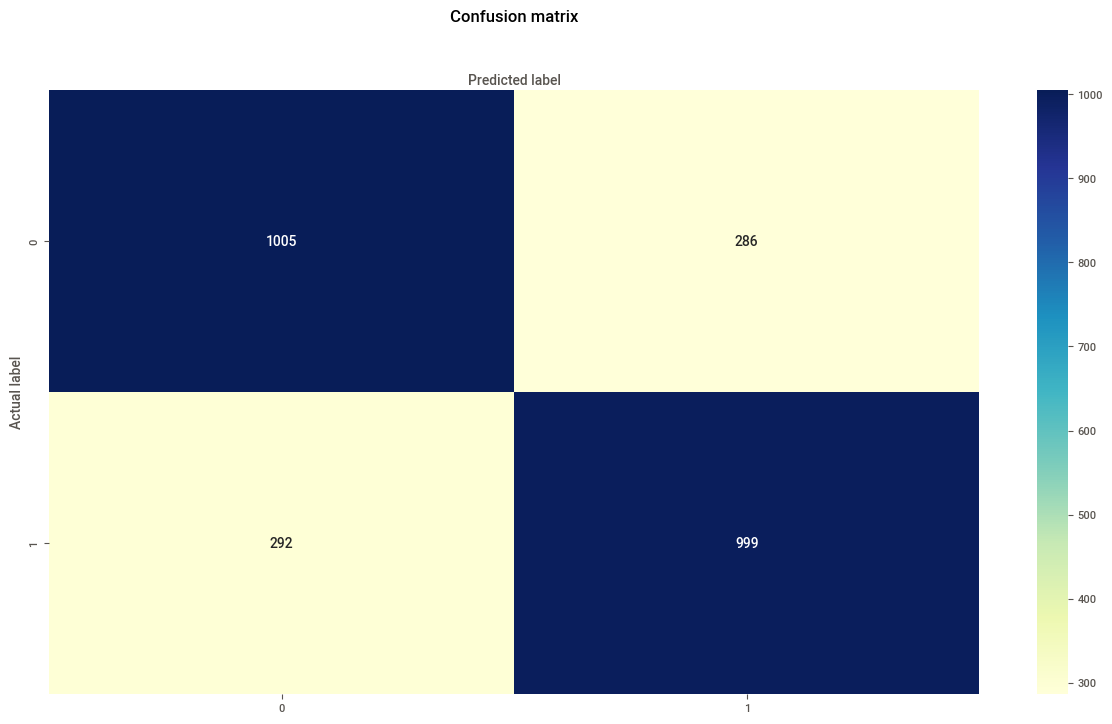

In [85]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix4, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# Visualizing the Decision Tree

**we will use graphviz to visualize**

In [86]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.datasets import load_iris



import graphviz
features =['Tenure','MonthlyCharges','TotalCharges','Gender','Dependents','PhoneService','SeniorCitizen','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                         
                               
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Notes

**Gini**

Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

0 denotes that all elements belong to a certain class or if there exists only one class, and

1 denotes that the elements are randomly distributed across various classes.

A Gini Index of 0.5 denotes equally distributed elements into some classes.

**Samples**

It refers to what is left at a particular point in decision 

**Value**
Let's say value = [6 , 7], it means 6 will get a "NO", and 7 will get a "YES" (Churn).

# 5. Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

#creating xbb  classifier
gb_clf2 = GradientBoostingClassifier(n_estimators=500, max_depth=5, random_state=42)

#Training the model using the training sets
gb_clf2.fit(X_train_res, y_train_res)

#Predicting the response for test dataset
y_pred = gb_clf2.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,y_pred)
prec = precision_score(y_test_res,y_pred)
rec = recall_score(y_test_res, y_pred)
f1 = f1_score(y_test_res,y_pred)
f2 = fbeta_score(y_test_res,y_pred,beta=2.0)

Model_results = pd.DataFrame([['Gradient Boosting',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

Model  Accuracy  Precision    Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.828040  0.784587  0.810094
1                   SVM  0.803641   0.778805  0.848180  0.812013  0.833333
2                   KNN  0.783114   0.726596  0.907823  0.807163  0.864689
3         Decision Tree  0.776143   0.777432  0.773819  0.775621  0.774539
4     Gradient Boosting  0.850503   0.847809  0.854376  0.851080  0.853055

In [88]:
# Feature Importance of the Model
sm_xgb_importance = gb_clf2.feature_importances_
sm_xgb_importance = pd.DataFrame(sm_xgb_importance,
                                 columns=["score"]).reset_index()
sm_xgb_importance["Feature"] = list(X.columns)
sm_xgb_importance.drop(columns=["index"], inplace=True)
sm_xgb_importance.sort_values(by="score",
                              ascending=False,
                              ignore_index=True,
                              inplace=True)

fig = px.bar(sm_xgb_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [89]:
#defining confusion metrics
cnf_matrix5 = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix5 =pd.DataFrame(cnf_matrix5).reset_index(drop =True)
cnf_matrix5

0     1
0  1093   198
1   188  1103

# Visualizing Confusion Matrix using Heatmap

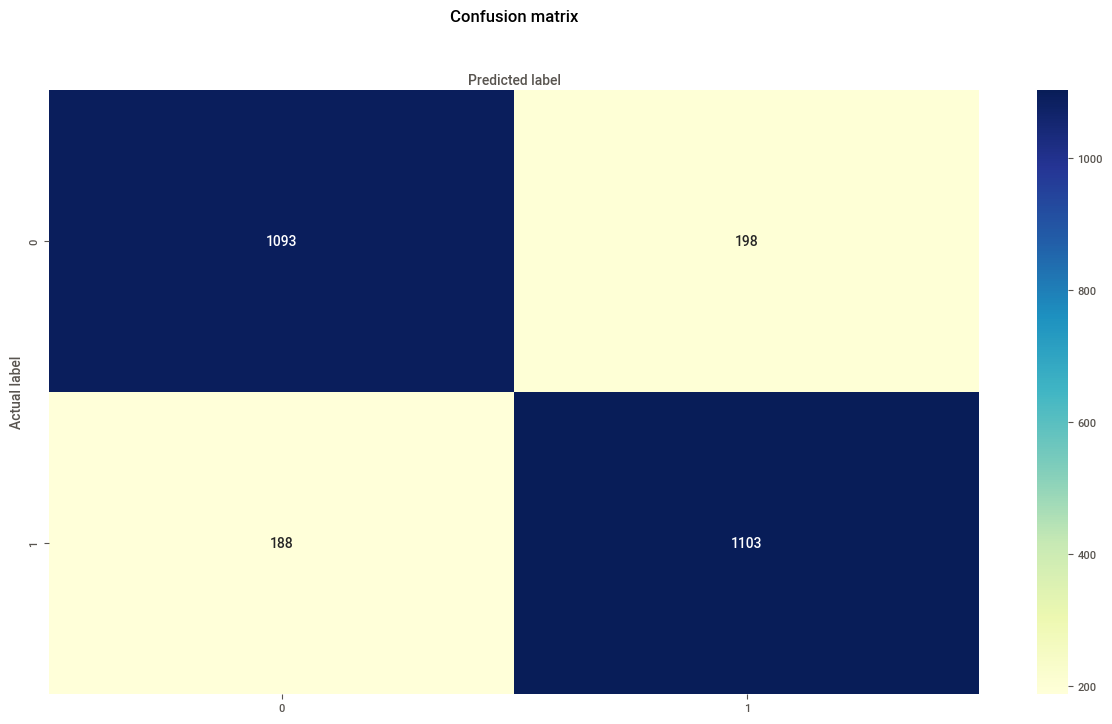

In [90]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix5, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 6. Random Forest

In [91]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a  Classifier
clf1=RandomForestClassifier()

#Train the model using the training sets
model_train=clf1.fit(X_train_res, y_train_res)

#Predicting the response for test dataset
y_pred = clf1.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,y_pred)
prec = precision_score(y_test_res,y_pred)
rec = recall_score(y_test_res , y_pred)
f1 = f1_score(y_test_res,y_pred)
f2 = fbeta_score(y_test_res,y_pred,beta=2.0)

Model_results = pd.DataFrame([['Random Forest',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

Model  Accuracy  Precision    Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.828040  0.784587  0.810094
1                   SVM  0.803641   0.778805  0.848180  0.812013  0.833333
2                   KNN  0.783114   0.726596  0.907823  0.807163  0.864689
3         Decision Tree  0.776143   0.777432  0.773819  0.775621  0.774539
4     Gradient Boosting  0.850503   0.847809  0.854376  0.851080  0.853055
5         Random Forest  0.855926   0.839616  0.879938  0.859304  0.871567

In [92]:
# Feature Importance of the Model
sm_rf_importance = clf1.feature_importances_
sm_rf_importance = pd.DataFrame(sm_rf_importance,
                                columns=["score"]).reset_index()
sm_rf_importance["Feature"] = list(X.columns)
sm_rf_importance.drop(columns=["index"], inplace=True)
sm_rf_importance.sort_values(by="score",
                             ascending=False,
                             ignore_index=True,
                             inplace=True)

fig = px.bar(sm_rf_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [93]:
#defining confusion metrics
cnf_matrix6 = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix6 =pd.DataFrame(cnf_matrix6).reset_index(drop =True)
cnf_matrix6

0     1
0  1074   217
1   155  1136

# Visualizing Confusion Matrix using Heatmap

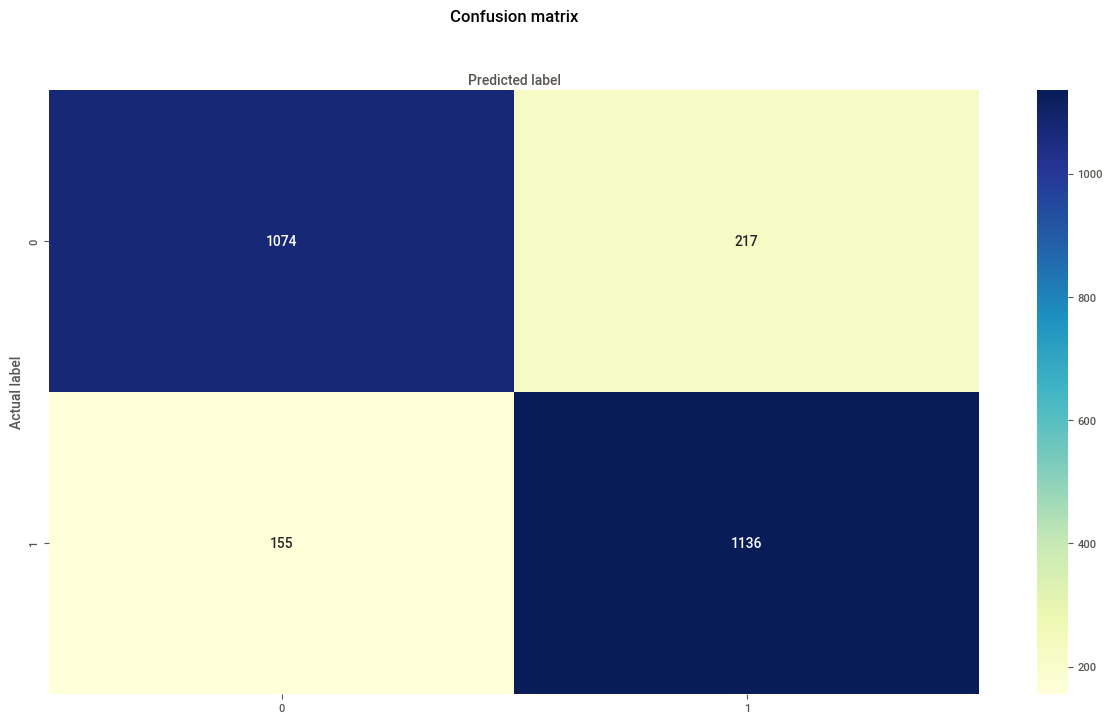

In [94]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix6, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 7. ADABOOST

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# initializing the adaBoost classifier or creating a classifier
ada = AdaBoostClassifier()
# Train Adaboost Classifer
model = ada.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred = model.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,y_pred)
prec = precision_score(y_test_res,y_pred)
rec = recall_score(y_test_res, y_pred)
f1 = f1_score(y_test_res,y_pred)
f2 = fbeta_score(y_test_res,y_pred,beta=2.0)

Model_results = pd.DataFrame([['AdaBoost',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

Model  Accuracy  Precision    Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.828040  0.784587  0.810094
1                   SVM  0.803641   0.778805  0.848180  0.812013  0.833333
2                   KNN  0.783114   0.726596  0.907823  0.807163  0.864689
3         Decision Tree  0.776143   0.777432  0.773819  0.775621  0.774539
4     Gradient Boosting  0.850503   0.847809  0.854376  0.851080  0.853055
5         Random Forest  0.855926   0.839616  0.879938  0.859304  0.871567
6              AdaBoost  0.807901   0.772821  0.872192  0.819505  0.850325

In [96]:
# Feature Importance of the Model
sm_ada_importance = ada.feature_importances_
sm_ada_importance = pd.DataFrame(sm_rf_importance,
                                columns=["score"]).reset_index()
sm_ada_importance["Feature"] = list(X.columns)
sm_ada_importance.drop(columns=["index"], inplace=True)
sm_ada_importance.sort_values(by="score",
                             ascending=False,
                             ignore_index=True,
                             inplace=True)

fig = px.bar(sm_ada_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [97]:
#defining confusion metrics
cnf_matrix7 = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix7 =pd.DataFrame(cnf_matrix7).reset_index(drop =True)
cnf_matrix7

0     1
0  960   331
1  165  1126

# Visualizing Confusion Matrix using Heatmap

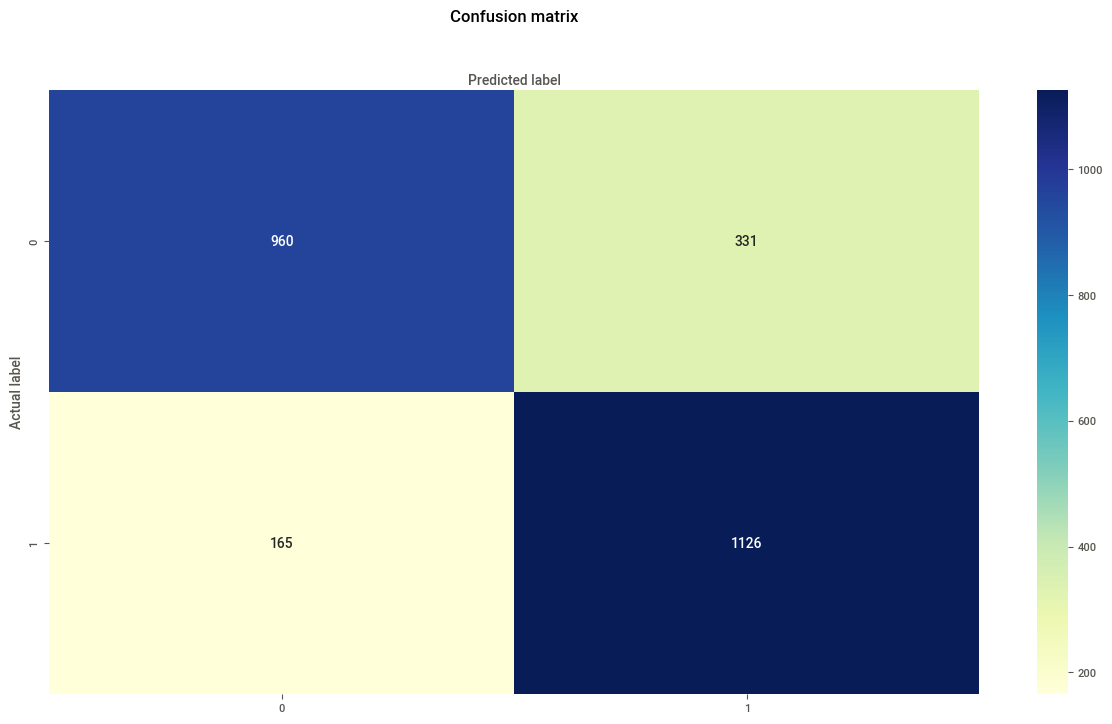

In [98]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix7, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# 8. CATBOOST

In [99]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier
from catboost import Pool


# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train_res, y_train_res)

# making predictions
catboost_pred = CatBoost_clf.predict(X_test_res)

#evaluate results
acc = accuracy_score(y_test_res,catboost_pred )
prec = precision_score(y_test_res,catboost_pred )
rec = recall_score(y_test_res, catboost_pred )
f1 = f1_score(y_test_res,catboost_pred )
f2 = fbeta_score(y_test_res,catboost_pred ,beta=2.0)



Learning rate set to 0.02469
0:	learn: 0.6804361	total: 216ms	remaining: 3m 35s
1:	learn: 0.6677152	total: 245ms	remaining: 2m 2s
2:	learn: 0.6564381	total: 270ms	remaining: 1m 29s
3:	learn: 0.6449678	total: 294ms	remaining: 1m 13s
4:	learn: 0.6360099	total: 316ms	remaining: 1m 2s
5:	learn: 0.6261553	total: 340ms	remaining: 56.4s
6:	learn: 0.6163721	total: 362ms	remaining: 51.3s
7:	learn: 0.6077734	total: 384ms	remaining: 47.6s
8:	learn: 0.5995178	total: 414ms	remaining: 45.6s
9:	learn: 0.5923444	total: 448ms	remaining: 44.4s
10:	learn: 0.5841771	total: 481ms	remaining: 43.2s
11:	learn: 0.5775450	total: 514ms	remaining: 42.3s
12:	learn: 0.5714456	total: 543ms	remaining: 41.2s
13:	learn: 0.5653740	total: 569ms	remaining: 40.1s
14:	learn: 0.5600203	total: 590ms	remaining: 38.7s
15:	learn: 0.5550479	total: 610ms	remaining: 37.5s
16:	learn: 0.5490227	total: 637ms	remaining: 36.8s
17:	learn: 0.5441011	total: 662ms	remaining: 36.1s
18:	learn: 0.5391557	total: 696ms	remaining: 36s
19:	learn: 

163:	learn: 0.3647051	total: 5.01s	remaining: 25.5s
164:	learn: 0.3645248	total: 5.04s	remaining: 25.5s
165:	learn: 0.3640099	total: 5.07s	remaining: 25.5s
166:	learn: 0.3636035	total: 5.09s	remaining: 25.4s
167:	learn: 0.3633459	total: 5.11s	remaining: 25.3s
168:	learn: 0.3629067	total: 5.13s	remaining: 25.2s
169:	learn: 0.3623158	total: 5.15s	remaining: 25.1s
170:	learn: 0.3620293	total: 5.17s	remaining: 25.1s
171:	learn: 0.3614874	total: 5.19s	remaining: 25s
172:	learn: 0.3612829	total: 5.21s	remaining: 24.9s
173:	learn: 0.3610352	total: 5.24s	remaining: 24.9s
174:	learn: 0.3608145	total: 5.26s	remaining: 24.8s
175:	learn: 0.3602323	total: 5.28s	remaining: 24.7s
176:	learn: 0.3600200	total: 5.3s	remaining: 24.7s
177:	learn: 0.3597657	total: 5.32s	remaining: 24.6s
178:	learn: 0.3591218	total: 5.34s	remaining: 24.5s
179:	learn: 0.3588577	total: 5.37s	remaining: 24.5s
180:	learn: 0.3584018	total: 5.4s	remaining: 24.4s
181:	learn: 0.3580530	total: 5.42s	remaining: 24.4s
182:	learn: 0.35

326:	learn: 0.3247348	total: 9.27s	remaining: 19.1s
327:	learn: 0.3244952	total: 9.32s	remaining: 19.1s
328:	learn: 0.3242470	total: 9.35s	remaining: 19.1s
329:	learn: 0.3239050	total: 9.37s	remaining: 19s
330:	learn: 0.3237830	total: 9.4s	remaining: 19s
331:	learn: 0.3236431	total: 9.42s	remaining: 19s
332:	learn: 0.3234764	total: 9.44s	remaining: 18.9s
333:	learn: 0.3233259	total: 9.48s	remaining: 18.9s
334:	learn: 0.3230588	total: 9.5s	remaining: 18.9s
335:	learn: 0.3229046	total: 9.52s	remaining: 18.8s
336:	learn: 0.3227030	total: 9.54s	remaining: 18.8s
337:	learn: 0.3225286	total: 9.56s	remaining: 18.7s
338:	learn: 0.3223984	total: 9.59s	remaining: 18.7s
339:	learn: 0.3221630	total: 9.61s	remaining: 18.7s
340:	learn: 0.3219443	total: 9.63s	remaining: 18.6s
341:	learn: 0.3217590	total: 9.65s	remaining: 18.6s
342:	learn: 0.3216496	total: 9.67s	remaining: 18.5s
343:	learn: 0.3213318	total: 9.71s	remaining: 18.5s
344:	learn: 0.3211548	total: 9.73s	remaining: 18.5s
345:	learn: 0.321025

490:	learn: 0.2962358	total: 16.5s	remaining: 17.1s
491:	learn: 0.2960946	total: 16.7s	remaining: 17.2s
492:	learn: 0.2959388	total: 16.9s	remaining: 17.4s
493:	learn: 0.2958169	total: 17.1s	remaining: 17.5s
494:	learn: 0.2956757	total: 17.1s	remaining: 17.4s
495:	learn: 0.2955698	total: 17.1s	remaining: 17.4s
496:	learn: 0.2954557	total: 17.2s	remaining: 17.4s
497:	learn: 0.2952675	total: 17.2s	remaining: 17.4s
498:	learn: 0.2951313	total: 17.2s	remaining: 17.3s
499:	learn: 0.2949602	total: 17.3s	remaining: 17.3s
500:	learn: 0.2948607	total: 17.3s	remaining: 17.3s
501:	learn: 0.2947166	total: 17.4s	remaining: 17.2s
502:	learn: 0.2946185	total: 17.4s	remaining: 17.2s
503:	learn: 0.2944743	total: 17.5s	remaining: 17.2s
504:	learn: 0.2943614	total: 17.5s	remaining: 17.2s
505:	learn: 0.2942476	total: 17.5s	remaining: 17.1s
506:	learn: 0.2941373	total: 17.6s	remaining: 17.1s
507:	learn: 0.2939766	total: 17.6s	remaining: 17s
508:	learn: 0.2938429	total: 17.7s	remaining: 17s
509:	learn: 0.29

649:	learn: 0.2758633	total: 23s	remaining: 12.4s
650:	learn: 0.2757578	total: 23.1s	remaining: 12.4s
651:	learn: 0.2756721	total: 23.2s	remaining: 12.4s
652:	learn: 0.2755879	total: 23.2s	remaining: 12.3s
653:	learn: 0.2753747	total: 23.2s	remaining: 12.3s
654:	learn: 0.2752482	total: 23.2s	remaining: 12.2s
655:	learn: 0.2750881	total: 23.3s	remaining: 12.2s
656:	learn: 0.2749949	total: 23.3s	remaining: 12.2s
657:	learn: 0.2747737	total: 23.3s	remaining: 12.1s
658:	learn: 0.2746586	total: 23.3s	remaining: 12.1s
659:	learn: 0.2745853	total: 23.3s	remaining: 12s
660:	learn: 0.2745025	total: 23.4s	remaining: 12s
661:	learn: 0.2743928	total: 23.4s	remaining: 11.9s
662:	learn: 0.2743035	total: 23.4s	remaining: 11.9s
663:	learn: 0.2742025	total: 23.4s	remaining: 11.9s
664:	learn: 0.2740938	total: 23.5s	remaining: 11.8s
665:	learn: 0.2739520	total: 23.5s	remaining: 11.8s
666:	learn: 0.2738531	total: 23.5s	remaining: 11.7s
667:	learn: 0.2737595	total: 23.5s	remaining: 11.7s
668:	learn: 0.2736

811:	learn: 0.2593756	total: 28.5s	remaining: 6.6s
812:	learn: 0.2593038	total: 28.5s	remaining: 6.56s
813:	learn: 0.2592098	total: 28.6s	remaining: 6.53s
814:	learn: 0.2591633	total: 28.6s	remaining: 6.5s
815:	learn: 0.2590668	total: 28.6s	remaining: 6.46s
816:	learn: 0.2589715	total: 28.7s	remaining: 6.43s
817:	learn: 0.2588885	total: 28.7s	remaining: 6.39s
818:	learn: 0.2588407	total: 28.8s	remaining: 6.36s
819:	learn: 0.2587654	total: 28.8s	remaining: 6.32s
820:	learn: 0.2586387	total: 28.8s	remaining: 6.28s
821:	learn: 0.2585236	total: 28.9s	remaining: 6.25s
822:	learn: 0.2584345	total: 28.9s	remaining: 6.21s
823:	learn: 0.2583575	total: 28.9s	remaining: 6.18s
824:	learn: 0.2582674	total: 29s	remaining: 6.15s
825:	learn: 0.2581887	total: 29.1s	remaining: 6.12s
826:	learn: 0.2580796	total: 29.1s	remaining: 6.09s
827:	learn: 0.2579563	total: 29.2s	remaining: 6.07s
828:	learn: 0.2578685	total: 29.3s	remaining: 6.03s
829:	learn: 0.2577198	total: 29.3s	remaining: 6.01s
830:	learn: 0.25

973:	learn: 0.2458811	total: 35.5s	remaining: 947ms
974:	learn: 0.2458013	total: 35.5s	remaining: 911ms
975:	learn: 0.2457553	total: 35.6s	remaining: 875ms
976:	learn: 0.2456778	total: 35.6s	remaining: 839ms
977:	learn: 0.2456429	total: 35.7s	remaining: 803ms
978:	learn: 0.2455900	total: 35.7s	remaining: 767ms
979:	learn: 0.2455249	total: 35.8s	remaining: 731ms
980:	learn: 0.2454234	total: 35.8s	remaining: 694ms
981:	learn: 0.2453382	total: 35.9s	remaining: 658ms
982:	learn: 0.2452897	total: 36.1s	remaining: 625ms
983:	learn: 0.2452490	total: 36.2s	remaining: 589ms
984:	learn: 0.2451769	total: 36.3s	remaining: 553ms
985:	learn: 0.2450717	total: 36.3s	remaining: 515ms
986:	learn: 0.2449755	total: 36.3s	remaining: 478ms
987:	learn: 0.2448864	total: 36.4s	remaining: 442ms
988:	learn: 0.2447919	total: 36.4s	remaining: 405ms
989:	learn: 0.2446966	total: 36.4s	remaining: 368ms
990:	learn: 0.2446424	total: 36.4s	remaining: 331ms
991:	learn: 0.2445564	total: 36.4s	remaining: 294ms
992:	learn: 

In [100]:
Model_results = pd.DataFrame([['CatBoost',acc,prec,rec,f1,f2]],columns=['Model', 'Accuracy','Precision','Recall','F1 score','F2 score'])
results = results.append(Model_results,ignore_index=True)
results

Model  Accuracy  Precision    Recall  F1 score  F2 score
0  Logistics Regression  0.772657   0.745467  0.828040  0.784587  0.810094
1                   SVM  0.803641   0.778805  0.848180  0.812013  0.833333
2                   KNN  0.783114   0.726596  0.907823  0.807163  0.864689
3         Decision Tree  0.776143   0.777432  0.773819  0.775621  0.774539
4     Gradient Boosting  0.850503   0.847809  0.854376  0.851080  0.853055
5         Random Forest  0.855926   0.839616  0.879938  0.859304  0.871567
6              AdaBoost  0.807901   0.772821  0.872192  0.819505  0.850325
7              CatBoost  0.853602   0.845049  0.865995  0.855394  0.861723

In [101]:
# Feature Importance of the Model
sm_catb_importance = CatBoost_clf.feature_importances_
sm_catb_importance = pd.DataFrame(sm_catb_importance,
                                  columns=["score"]).reset_index()

sm_catb_importance["Feature"] = list(X.columns)

sm_catb_importance.drop(columns=["index"], inplace=True)

sm_catb_importance.sort_values(by="score",
                               ascending=False,
                               ignore_index=True,
                               inplace=True)

fig = px.bar(sm_catb_importance, x="Feature", y="score")
fig.show()

# Model Evaluation Model_results using Confusion Matrix

In [103]:
#defining confusion metrics
cnf_matrix8 = metrics.confusion_matrix(y_test_res, y_pred)
cnf_matrix8 =pd.DataFrame(cnf_matrix8).reset_index(drop =True)
cnf_matrix8

0     1
0  960   331
1  165  1126

# Visualizing Confusion Matrix using Heatmap

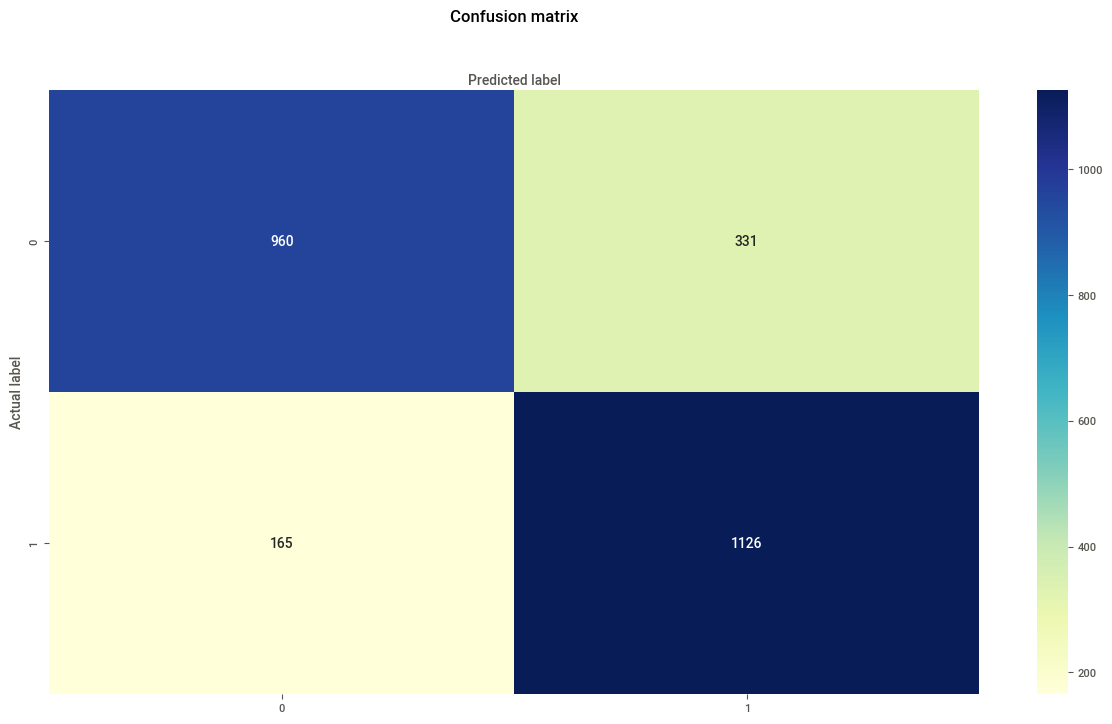

In [104]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix8, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

# VISUALIZING CATBOOST

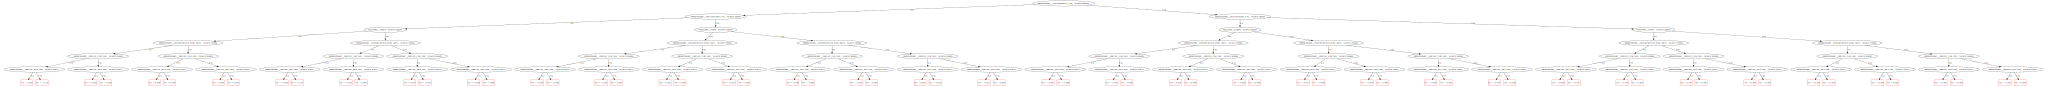

In [105]:
cat_features = list(X_train_res.columns)
pool = Pool(X_train_res, y_train_res, feature_names=cat_features)
model = CatBoostClassifier(verbose=0, one_hot_max_size=8).fit(pool)

model.plot_tree(tree_idx=1,pool=pool)

# Model selection and Model Optimization

**From above models , we noted that the Random Forest has the highest F2 and F1 scores,  ranking highest across all the 7 models**

# Cross-Validation and Hyperparameter tuning

**K-Fold Cross-Validation**

In [106]:
# Defining the number of folds for cross-validation and the range of estimators
from sklearn.feature_selection import SelectKBest, chi2 # Univariate Selection using KBest
from sklearn.model_selection import *  #cross_val_score, fbeta_score, KFold, make_scorer, train_test_split, RandomizedSearchCV
cv = list(range(10, 21, 5))

# Using a loop to cross-validate with each number in the range of estimators
for c in cv:
    score = cross_val_score(estimator = model_train, X = X_train_res, y = y_train_res, cv=c).mean()
    
    print(f"The average score after cross-validation for the model at {c} folds is:", "{0:.5}".format(score))

The average score after cross-validation for the model at 10 folds is: 0.84491
The average score after cross-validation for the model at 15 folds is: 0.84672
The average score after cross-validation for the model at 20 folds is: 0.84892


According to the results, the best performance on each iteration is at 100 estimators, with the mean score on cross-validation increasing with the number of estimators.


We may use these findings to inform additional tweaking and model optimization because it is the sole hyperparameter we tuned here.

**RandomizedSearch Cross-Validation**

In [107]:
# Defining the values and instantiating the grid to be used in the RandomizedSearch
n_estimators = list(range(10, 1001, 50))
random_grid = {
    "n_estimators": n_estimators,
    "max_depth": [1, 5, 10, 20, 50, 75, 100, 150, 200, 300],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", None],
    "random_state": [24]
}

In [108]:
# Running the RandomizedSearch Cross-Validation with the above set of Parameters
cv_model = RandomizedSearchCV(estimator= model_train,
                                     param_distributions= random_grid,
                                     n_iter= 30,
                                     cv= 10,
                                     random_state= 24,
                                     n_jobs= -1)

# Fitting the model to the training data
cv_model.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200, 300],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [10, 60, 110, 160, 210,
                                                         260, 310, 360, 410,
                                                         460, 510, 560, 610,
                                                         660, 710, 760, 810,
                                                         860, 910, 960],
                                        'random_state': [24]},
                   random_state=24)

In [109]:
# Looking at the best combination of hyperparameters for the model
best_params =cv_model.best_params_
print("The best combination of hyperparameters for the model will be:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name} : {best_params[param_name]}")

The best combination of hyperparameters for the model will be:
bootstrap : False
criterion : gini
max_depth : 20
max_features : log2
n_estimators : 510
random_state : 24


In [110]:
# Looking at the best score for the model during cross-validation
print("The mean cross-validated score of the model's best combination of hyperparameters is:",
      "{0:.5}".format(cv_model.best_score_))

The mean cross-validated score of the model's best combination of hyperparameters is: 0.85563


We observe a considerable increase in the model's score using the RandomizedSearchCV. As a result, using the suggested parameters listed above, we will construct a "optimal" version of the model and evaluate it

In [123]:
# Defining an optimized version of the model with the best parameters
best_cv_model = RandomForestClassifier(bootstrap= False,
                                            criterion= "gini",
                                            max_depth= 20,
                                            max_features= "log2",
                                            n_estimators= 510,
                                            random_state= 24
                                           )

In [124]:
# Fitting the model to the training data
best_cv_model= best_cv_model.fit(X_train_res, y_train_res)

# Predicting the test data
best_rf_pred = best_cv_model.predict(X_test_res)

In [125]:
from sklearn import metrics
from sklearn.metrics import *
#Evaluating the model
best_rf_report = classification_report(y_test_res, best_rf_pred, target_names= ["Stayed", "Churned"])
print(best_rf_report)

# Calculating the accuracy score
accuracy = accuracy_score(y_test_res, best_rf_pred)
accuracy = "{:.5f}".format(accuracy)
print("Accuracy:", accuracy)

# Calculating the F2 Score
f2_score = fbeta_score(y_test_res, best_rf_pred, beta=0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)

              precision    recall  f1-score   support

      Stayed       0.88      0.84      0.86      1291
     Churned       0.84      0.88      0.86      1291

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

Accuracy: 0.85941
F2 Score: 0.85087


In [126]:
#defining confusion metrics
cnf_matrix9 = metrics.confusion_matrix(y_test_res, best_rf_pred)
cnf_matrix9 =pd.DataFrame(cnf_matrix9).reset_index(drop =True)
cnf_matrix9

0     1
0  1079   212
1   151  1140

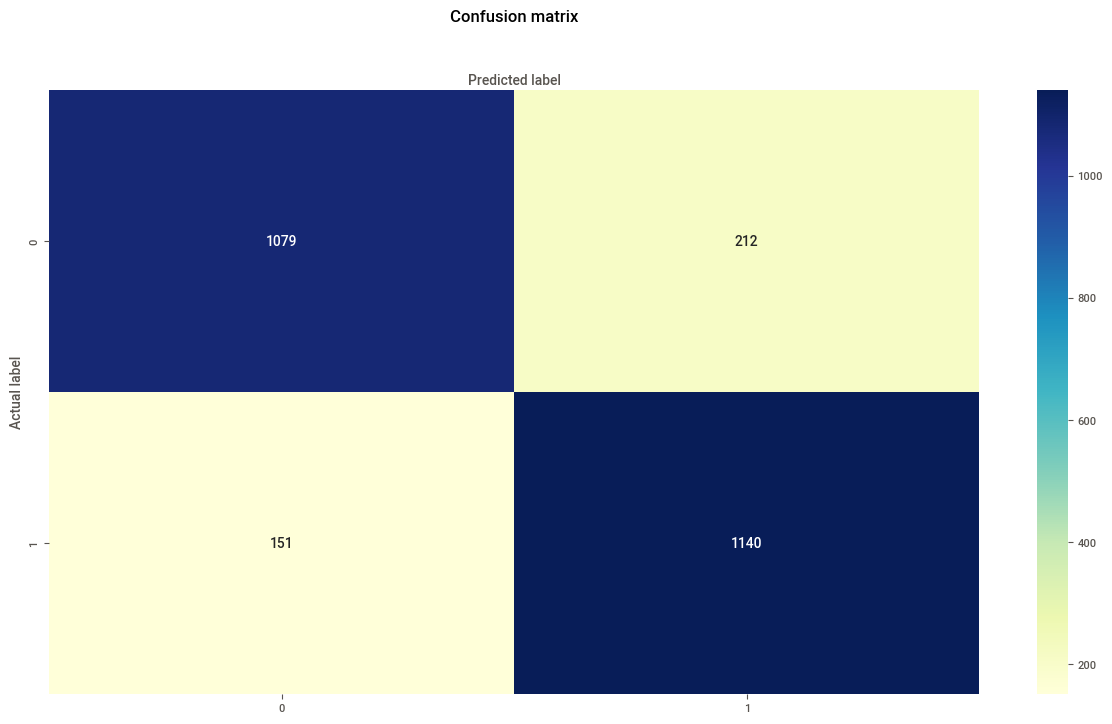

In [127]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix9, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

**So far this is our best model, therefore we will go ahead and make our future predictions**

# Future Prediction

In [116]:
# Initializing the model (just showing it)
best_cv_model

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       n_estimators=510, random_state=24)

In [117]:
# Creating a copy of the test data
final_test_data = test_data.copy()

# Defining the target & predictor variables
test_X = final_test_data.drop(columns=["Churn"])
test_y = final_test_data["Churn"]

In [118]:
test_X

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_SeniorCitizen  \
4214                         1.0                                         0.0   
1815                         0.0                                         0.0   
2370                         0.0                                         1.0   
5453                         1.0                                         0.0   
1786                         0.0                                         0.0   
...                          ...                                         ...   
4677                         0.0                                         0.0   
4760                         1.0                                         1.0   
6141                         1.0                                         0.0   
3229                         0.0                                         0.0   
4443                         1.0                                         1.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
4214                         0.0                            0.0   
1815                         1.0                            0.0   
2370                         1.0                            0.0   
5453                         1.0                            0.0   
1786                         1.0                            0.0   
...                          ...                            ...   
4677                         1.0                            0.0   
4760                         1.0                            1.0   
6141                         0.0                            0.0   
3229                         1.0                            1.0   
4443                         0.0                            0.0   

      onehotencoder__PhoneService_Yes  onehotencoder__PaperlessBilling_Yes  \
4214                              1.0                                  0.0   
1815                              1.0                                  0.0   
2370                              1.0                                  1.0   
5453                              1.0                                  1.0   
1786                              1.0                                  1.0   
...                               ...                                  ...   
4677                              1.0                                  1.0   
4760                              1.0                                  0.0   
6141                              1.0                                  0.0   
3229                              1.0                                  0.0   
4443                              1.0                                  1.0   

      onehotencoder__MultipleLines_No phone service  \
4214                                            0.0   
1815                                            0.0   
2370                                            0.0   
5453                                            0.0   
1786                                            0.0   
...                                             ...   
4677                                            0.0   
4760                                            0.0   
6141                                            0.0   
3229                                            0.0   
4443                                            0.0   

      onehotencoder__MultipleLines_Yes  \
4214                               0.0   
1815                               0.0   
2370                               0.0   
5453                               1.0   
1786                               0.0   
...                                ...   
4677                               1.0   
4760                               0.0   
6141                               0.0   
3229                               0.0   
4443                               1.0   

      onehotencoder__InternetService_Fiber optic  \
4214                                         0.0   
1815                             

In [119]:
# Predicting the test data
best_rf_pred = best_cv_model.predict(test_X)

# Evaluating the model
best_rf_report = classification_report(test_y, best_rf_pred, target_names=["Stayed", "Churned"])
print(best_rf_report)

# Calculating the F2 Score
f2_score = fbeta_score(test_y, best_rf_pred, beta= 0.5)
f2_score = "{:.5f}".format(f2_score)
print("F2 Score:", f2_score)

              precision    recall  f1-score   support

      Stayed       0.95      0.86      0.90      1549
     Churned       0.70      0.89      0.78       561

    accuracy                           0.87      2110
   macro avg       0.83      0.87      0.84      2110
weighted avg       0.89      0.87      0.87      2110

F2 Score: 0.72725


In [120]:
#defining confusion metrics
cnf_matrix10 = metrics.confusion_matrix(test_y, best_rf_pred)
cnf_matrix10 =pd.DataFrame(cnf_matrix10).reset_index(drop =True)
cnf_matrix10

0    1
0  1332  217
1    64  497

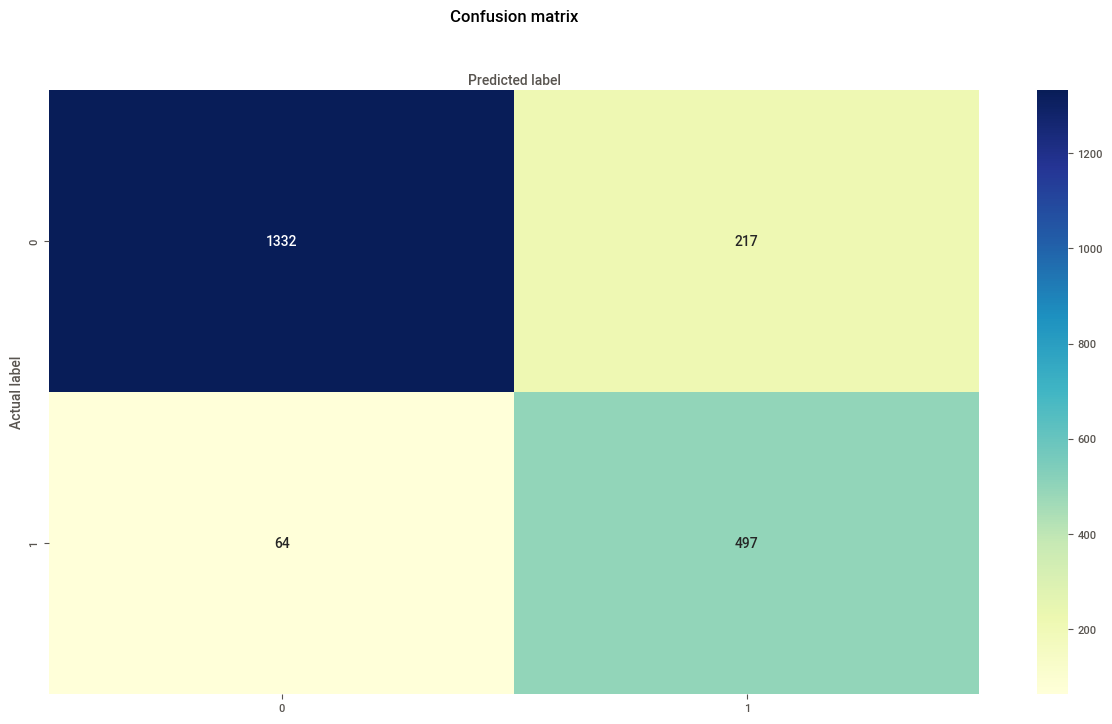

In [121]:
#visualizing confusion metrics
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix10, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_label_position("top")

From the performance of the model on the test data , we note that the Random Forest model performed  better on the test data . It is therefore recommended for further development and application.

# EXTRA STATISTICS USING PANDAS PROFILING

In [171]:
from pandas_profiling import ProfileReport
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]